# SLC FINAL EXAM

### ATTRIBUTE INFORMATION:  
Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists. 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 


**Education**

1 'Below College' 

2 'College' 

3 'Bachelor' 

4 'Master' 

5 'Doctor'


**Environment Satisfaction**


1 'Low' 

2 'Medium' 

3 'High' 

4 'Very High' 

**Job Involvement** 

1 'Low' 

2 'Medium' 

3 'High' 

4 'Very High' 


**Job Satisfaction 
1 'Low' 
2 'Medium'
3 'High' 
4 'Very High' 


Performance Rating 
1 'Low' 
2 'Good' 
3 'Excellent' 
4 'Outstanding' 
Relationship Satisfaction 
1 'Low' 
2 'Medium' 
3 'High' 
4 'Very High' 
Work 
Life Balance 
1 'Bad' 
2 'Good' 
3 'Better' 
4 'Best' 
 

 

### 1.	Read the dataset (tab, csv, xls, txt, inbuilt dataset)

In [63]:
# Kindly change the below cells from markdown to code and execute it 

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer, OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sma
from sklearn.metrics import roc_curve, confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, cohen_kappa_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

from warnings import filterwarnings
filterwarnings('ignore')

In [65]:
plt.rcParams['figure.figsize'] = [20,25]
pd.set_option('display.max_columns', 40)

In [66]:
import csv

with open("data_set2.csv","r")as file:
    
    reader = csv.reader(file)
    
df = pd.read_csv("data_set2.csv",nrows=917)

df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### 2.	Summarize important observations from the data set (5 Marks)

Some pointers which would help you, but don’t be limited by these

a.	Find out number of rows; no. & types of variables (continuous, categorical etc.)

b.	Calculate five-point summary for numerical variables

c.	Summarize observations for categorical variables – no. of categories, % observations in each category


In [67]:
df.shape

(917, 35)

In [68]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,917.0,36.873501,9.422479,18.0,30.0,36.0,43.0,60.0
DailyRate,917.0,814.970556,407.020026,102.0,472.0,827.0,1176.0,1499.0
DistanceFromHome,917.0,8.991276,8.072267,1.0,2.0,7.0,13.0,29.0
Education,917.0,2.872410,1.036491,1.0,2.0,3.0,4.0,5.0
EmployeeCount,917.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,917.0,630.988004,371.343582,1.0,315.0,615.0,958.0,1280.0
EnvironmentSatisfaction,917.0,2.712105,1.084828,1.0,2.0,3.0,4.0,4.0
HourlyRate,917.0,64.971647,20.215306,30.0,48.0,65.0,82.0,100.0
JobInvolvement,917.0,2.721919,0.704082,1.0,2.0,3.0,3.0,4.0
JobLevel,917.0,2.078517,1.137082,1.0,1.0,2.0,3.0,5.0


In [69]:
num_cols = df.select_dtypes(include = np.number)
cat_cols = df.select_dtypes(exclude = np.number)
# cat_Cols = ['Attrition','BusinessTravel', 'Deaprtment','EducationField','JobRole','Gender','MartialStatus','Over18','OverTime']

In [70]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       917 non-null    int64 
 1   Attrition                 917 non-null    object
 2   BusinessTravel            917 non-null    object
 3   DailyRate                 917 non-null    int64 
 4   Department                917 non-null    object
 5   DistanceFromHome          917 non-null    int64 
 6   Education                 917 non-null    int64 
 7   EducationField            917 non-null    object
 8   EmployeeCount             917 non-null    int64 
 9   EmployeeNumber            917 non-null    int64 
 10  EnvironmentSatisfaction   917 non-null    int64 
 11  Gender                    917 non-null    object
 12  HourlyRate                917 non-null    int64 
 13  JobInvolvement            917 non-null    int64 
 14  JobLevel                  

In [72]:
for i in df.select_dtypes(object):
    print('The no of categories in', i, 'are :', len(df[i].value_counts()))

The no of categories in Attrition are : 2
The no of categories in BusinessTravel are : 3
The no of categories in Department are : 3
The no of categories in EducationField are : 6
The no of categories in Gender are : 2
The no of categories in JobRole are : 9
The no of categories in MaritalStatus are : 3
The no of categories in Over18 are : 1
The no of categories in OverTime are : 2


In [73]:
num_cols.shape

(917, 26)

### 3.	Check for defects in the data. Perform necessary actions to ‘fix’ these defects (5 Marks)

Some pointers which would help you, but don’t be limited by these

a.	Do variables have missing/null values?

b.	Do variables have outliers?

c.	Is the Target distributed evenly? Is it a defect? If Yes, what steps are being taken to rectify the problem. 


In [74]:
# a. Do variables have missing/null values?

missing_values = pd.DataFrame({'Count': df.isnull().sum(),
                               'Percentage' : round(df.isnull().sum()/len(df)*100,2)})
missing_values

,Count,Percentage
Age,0,0.0
Attrition,0,0.0
BusinessTravel,0,0.0
DailyRate,0,0.0
Department,0,0.0
DistanceFromHome,0,0.0
Education,0,0.0
EducationField,0,0.0
EmployeeCount,0,0.0
EmployeeNumber,0,0.0


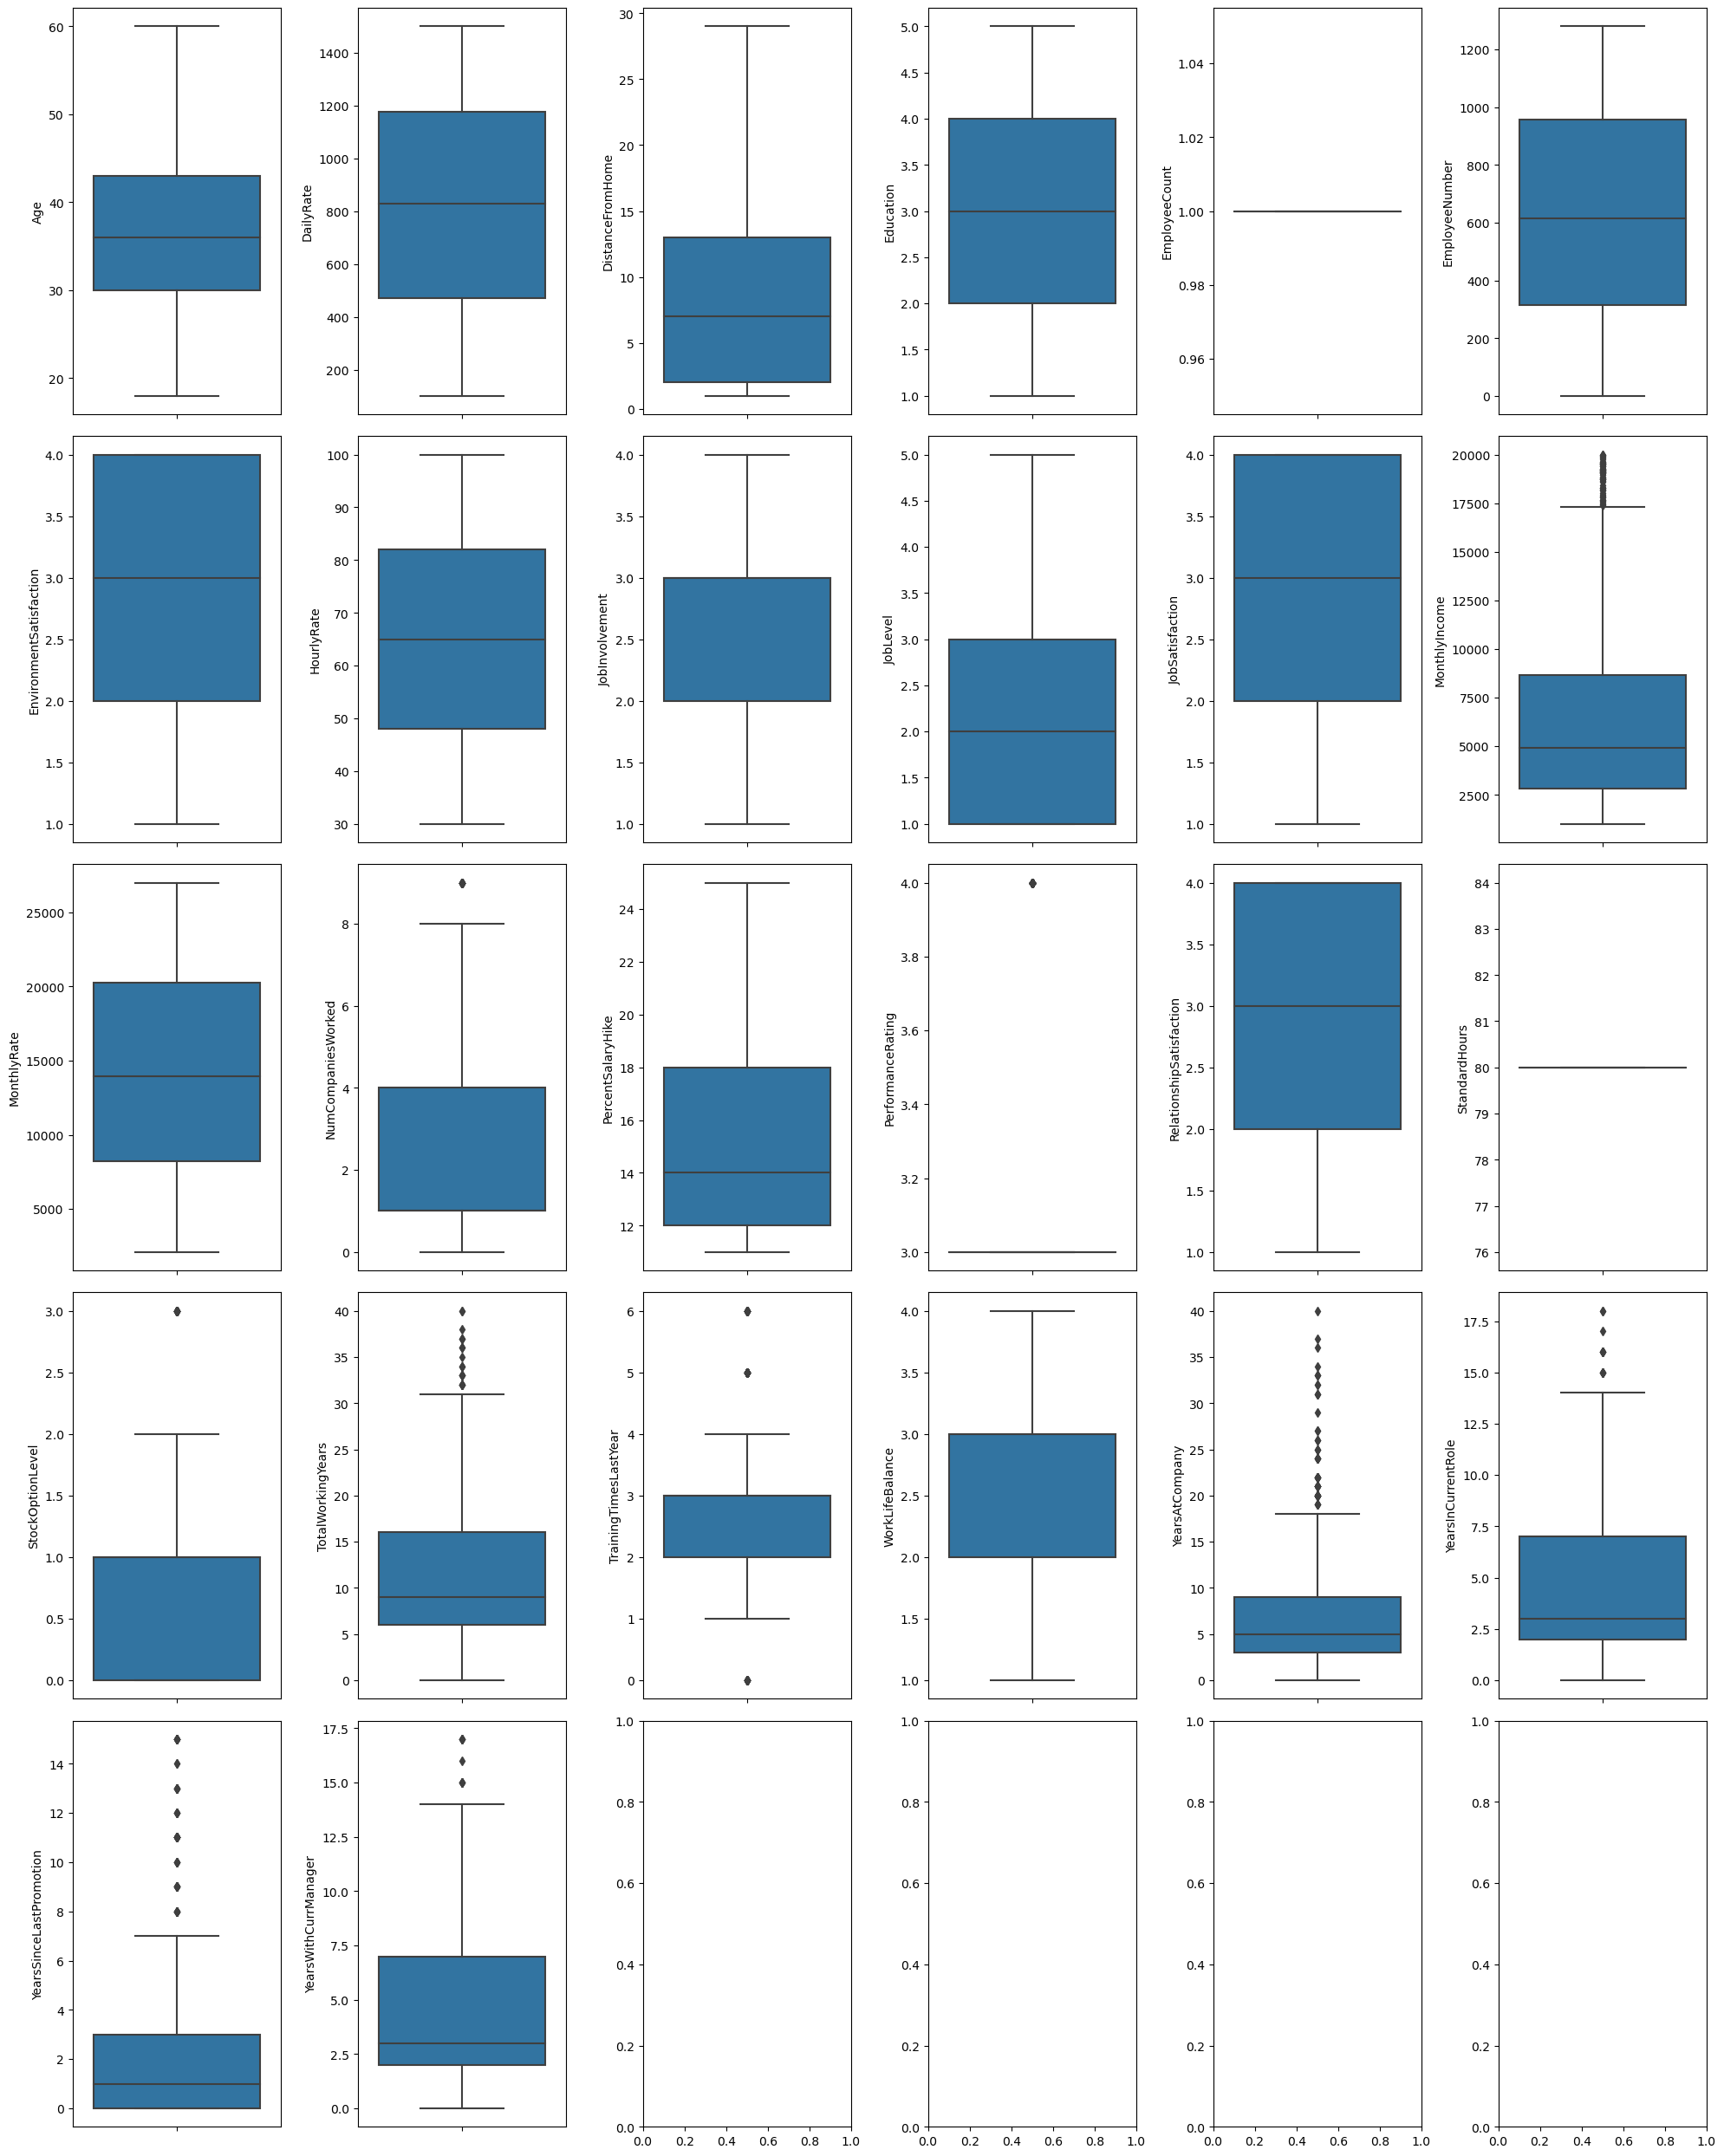

In [75]:
# b. Do variables have outliers?
# yes very few variables have ouliers.

fig, ax = plt.subplots(5, 6)
for i, v in zip(num_cols, ax.flatten()):
    sns.boxplot(y = df[i], ax = v)
plt.tight_layout()
plt.show()

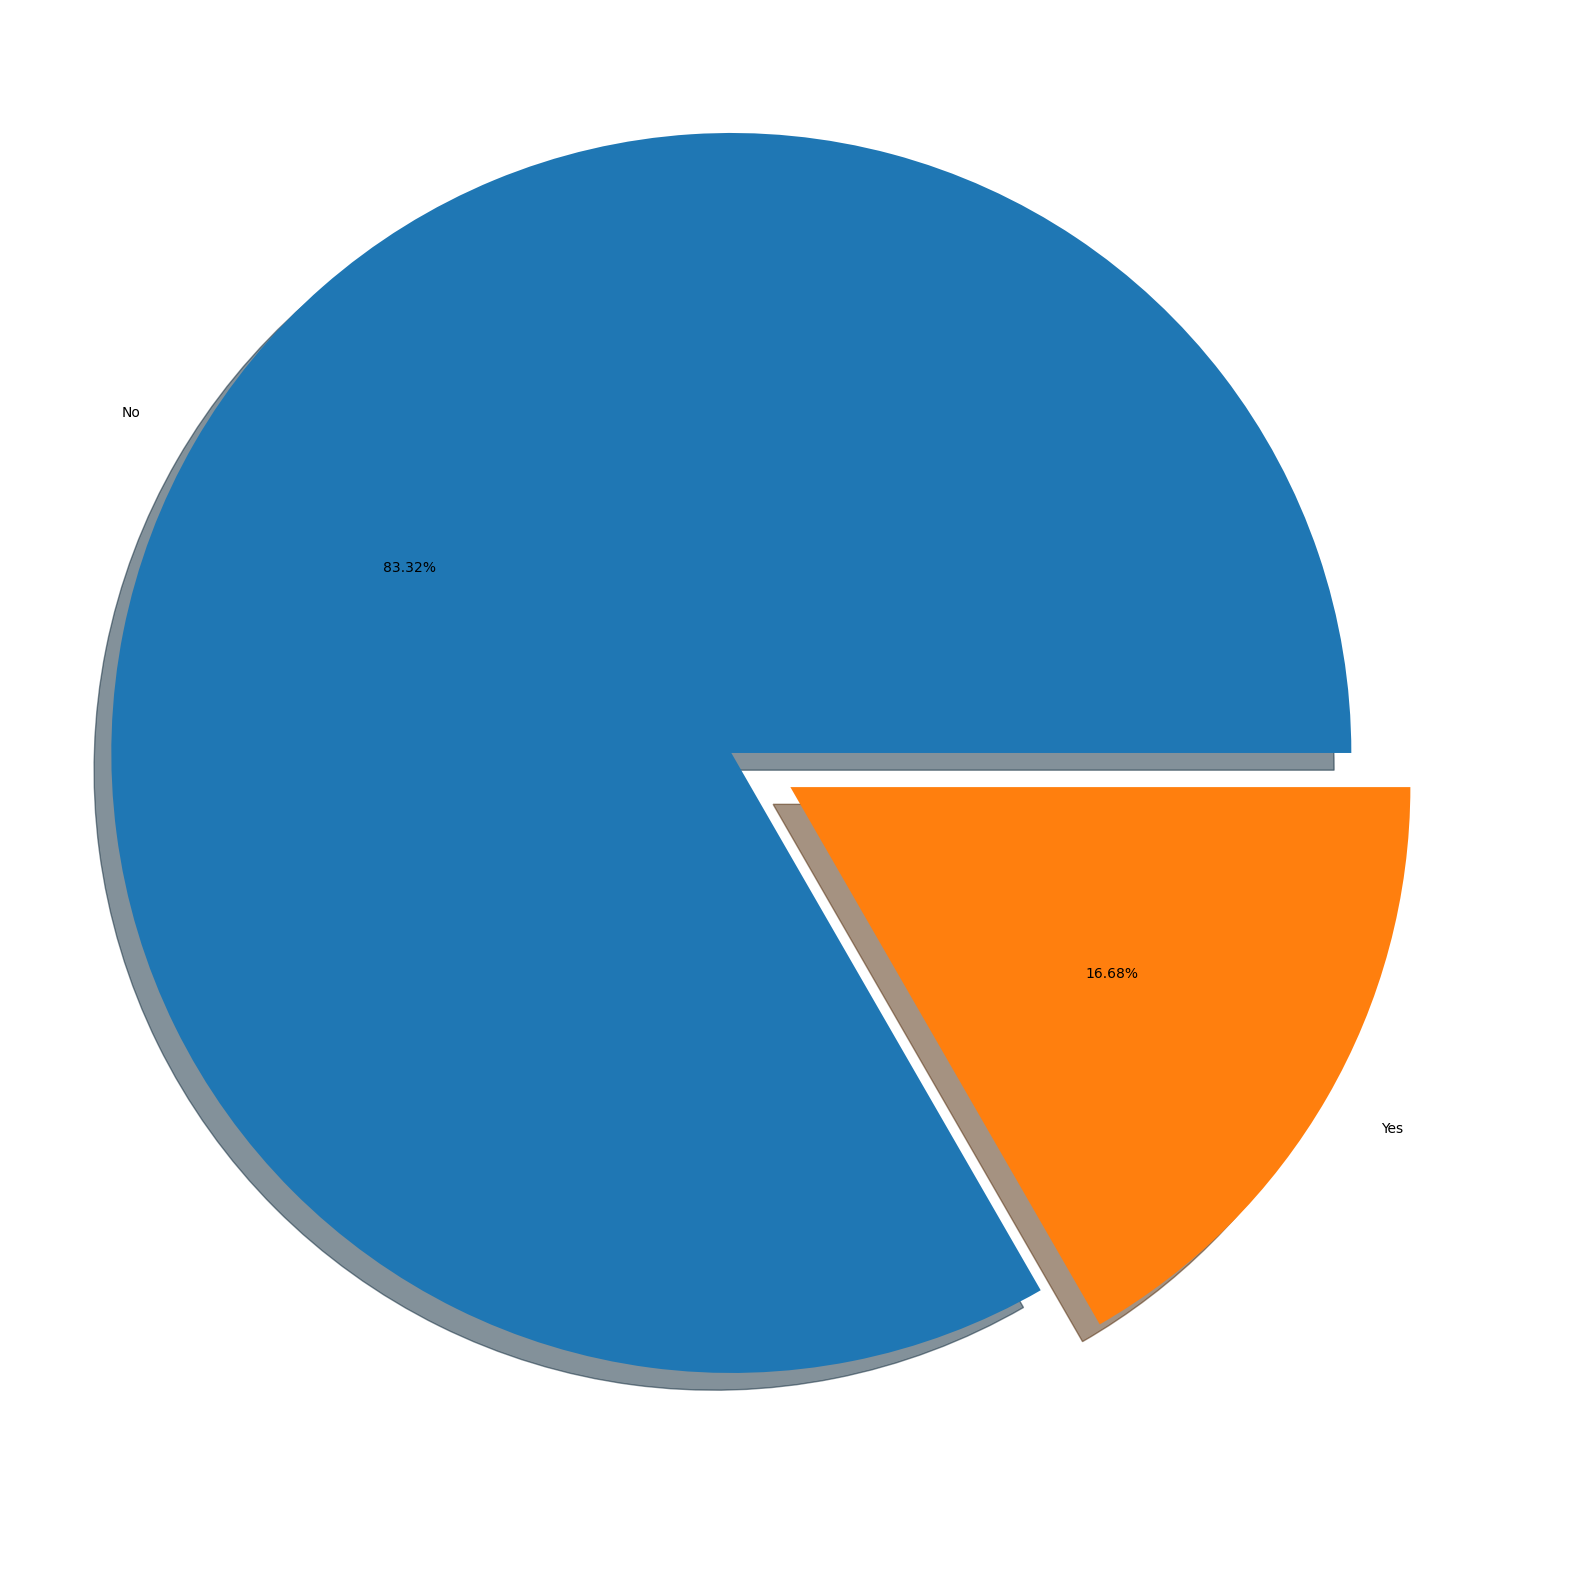

In [76]:
# c. Is the Target distributed evenly? Is it a defect? If Yes, what steps are being taken to rectify the problem.
# No the target variables is not evenly distributed

s = df['Attrition'].value_counts()
plt.pie(s, labels = s.index, autopct = "%.2f%%", shadow = True, explode = [0.1,0.01])
plt.show()

### 4.	Summarize relationships among variables (10 marks)               
a.	Plot relevant categorical plots. Find out which are the variables most correlated or appear to be in causation with Target? Do you want to exclude some variables from the model based on this analysis? What other actions will you take?


b.	Plot all independent variables with the target & find out the relationship? Perform the Relevant Tests to find out if the Independent variables are associated with the Target Variable.

 Hint: based on your observations you may want to transform features or create additional features.


In [77]:
num_cols.columns
num_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

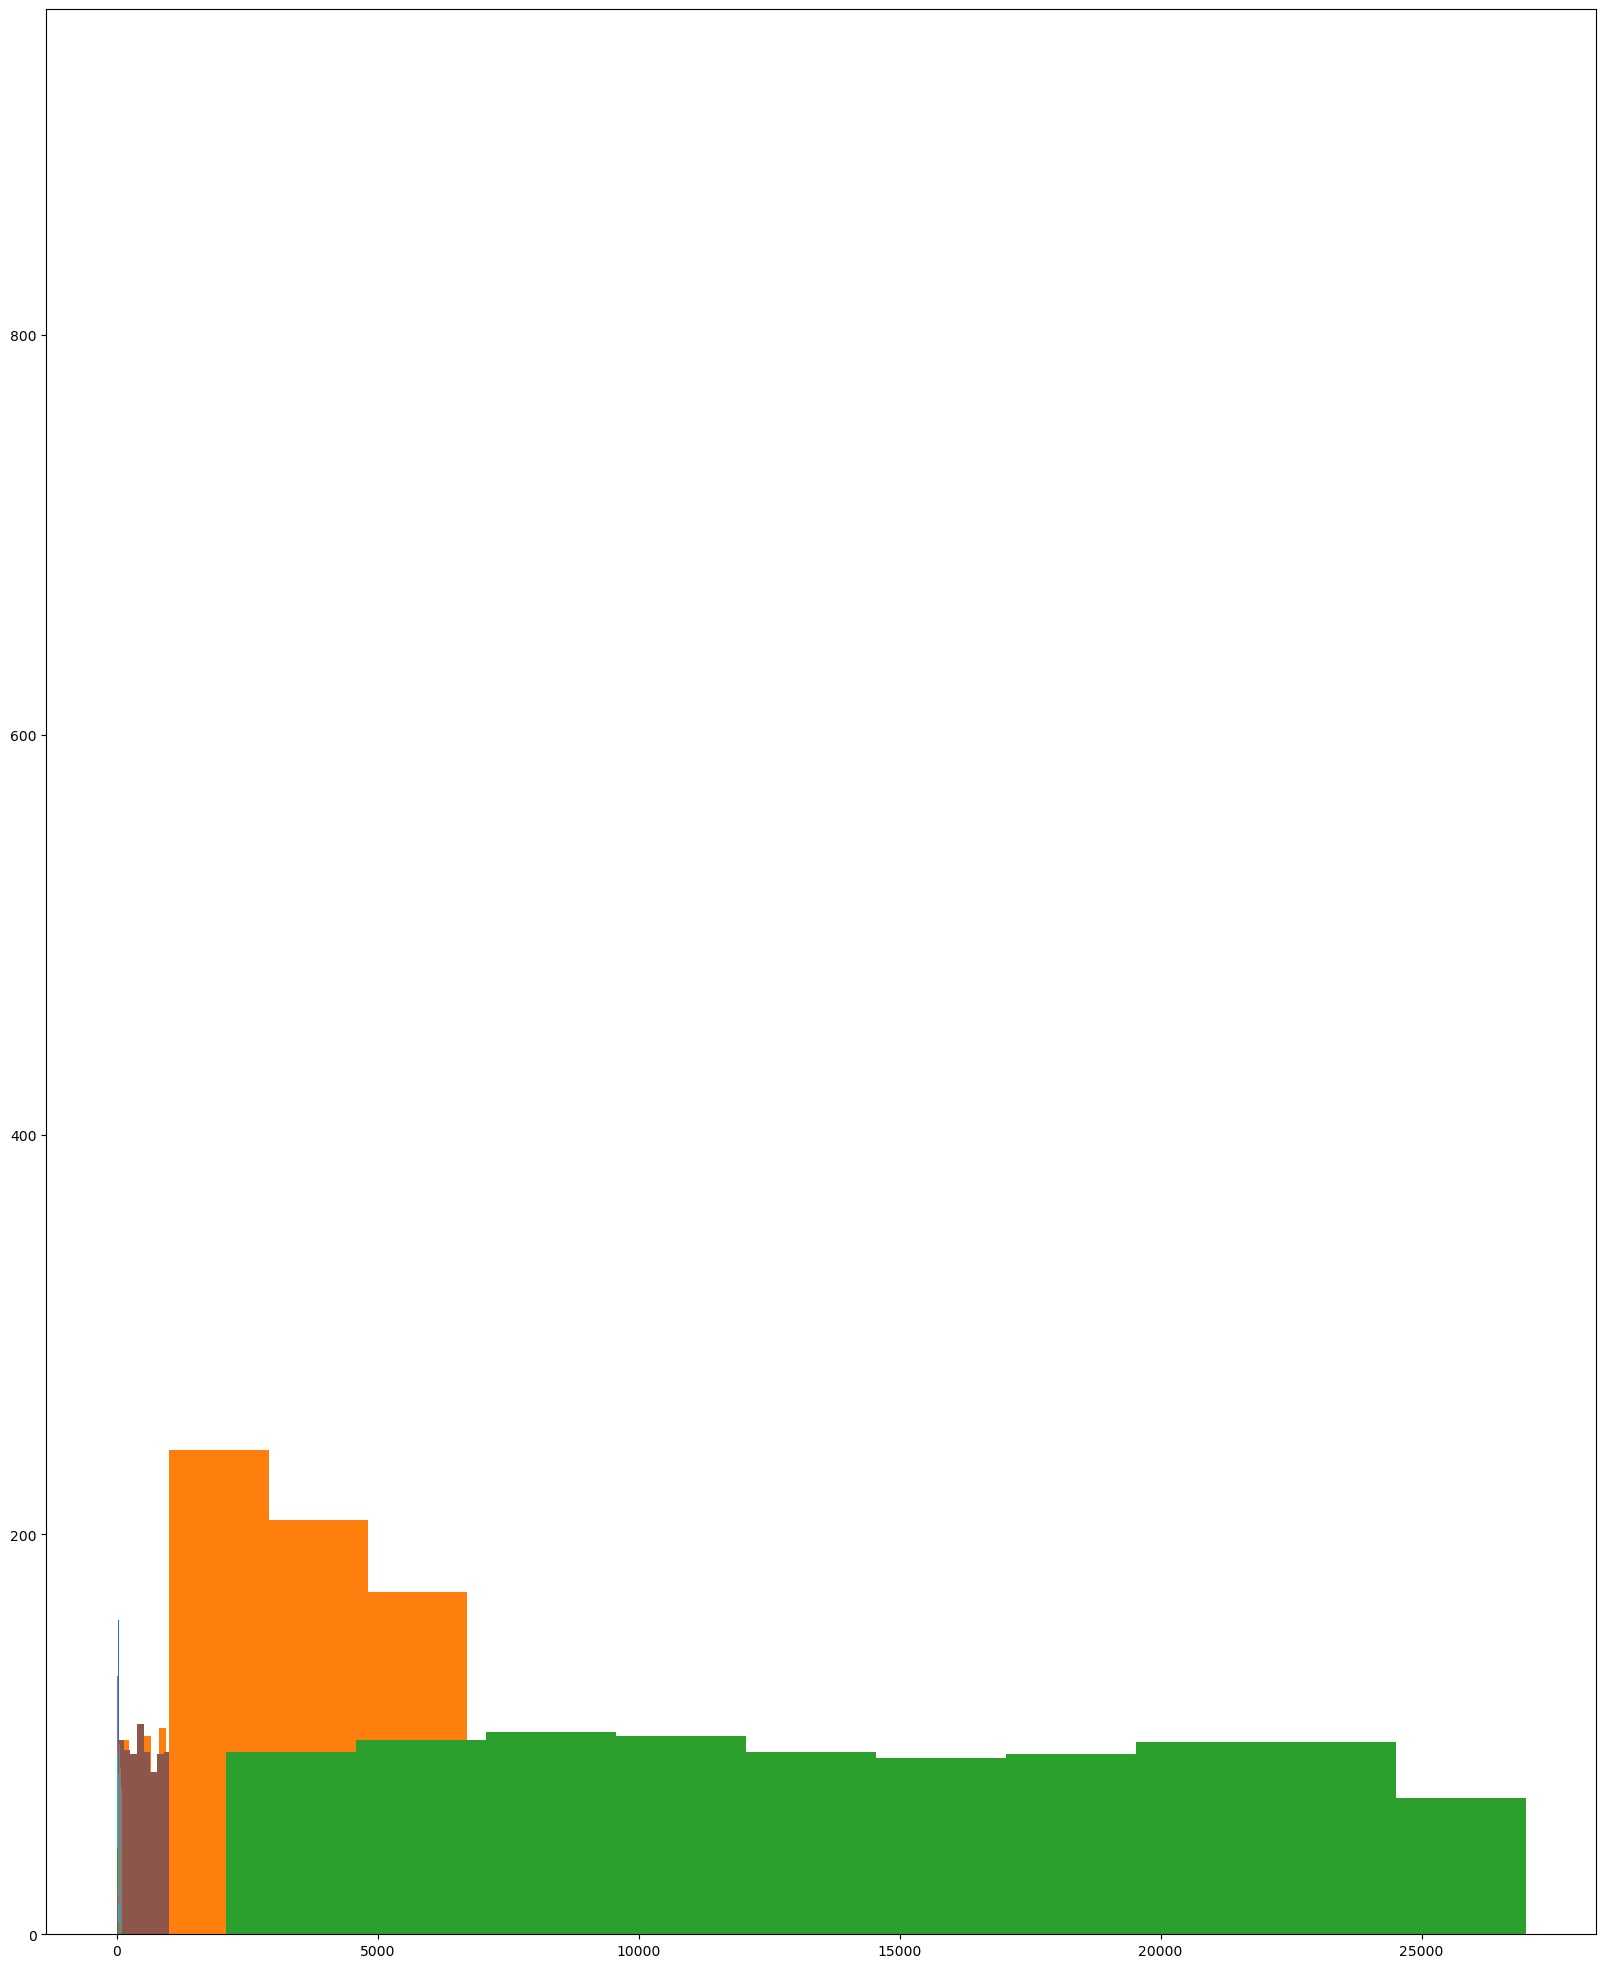

In [78]:
#Univarient Analysis for numeric columns:

# fig, x = plt.subplots(6,5)
# for i, v in zip(num_cols, ax.flatten()):
for i in num_cols:
    plt.hist(df[i])
# plt.tight_layout()
plt.show()

In [79]:
cat_cols

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
912,No,Travel_Rarely,Research & Development,Life Sciences,Male,Research Scientist,Single,Y,Yes
913,Yes,Travel_Rarely,Sales,Marketing,Female,Manager,Single,Y,Yes
914,No,Non-Travel,Research & Development,Medical,Male,Healthcare Representative,Divorced,Y,Yes
915,Yes,Travel_Frequently,Research & Development,Life Sciences,Female,Laboratory Technician,Single,Y,No


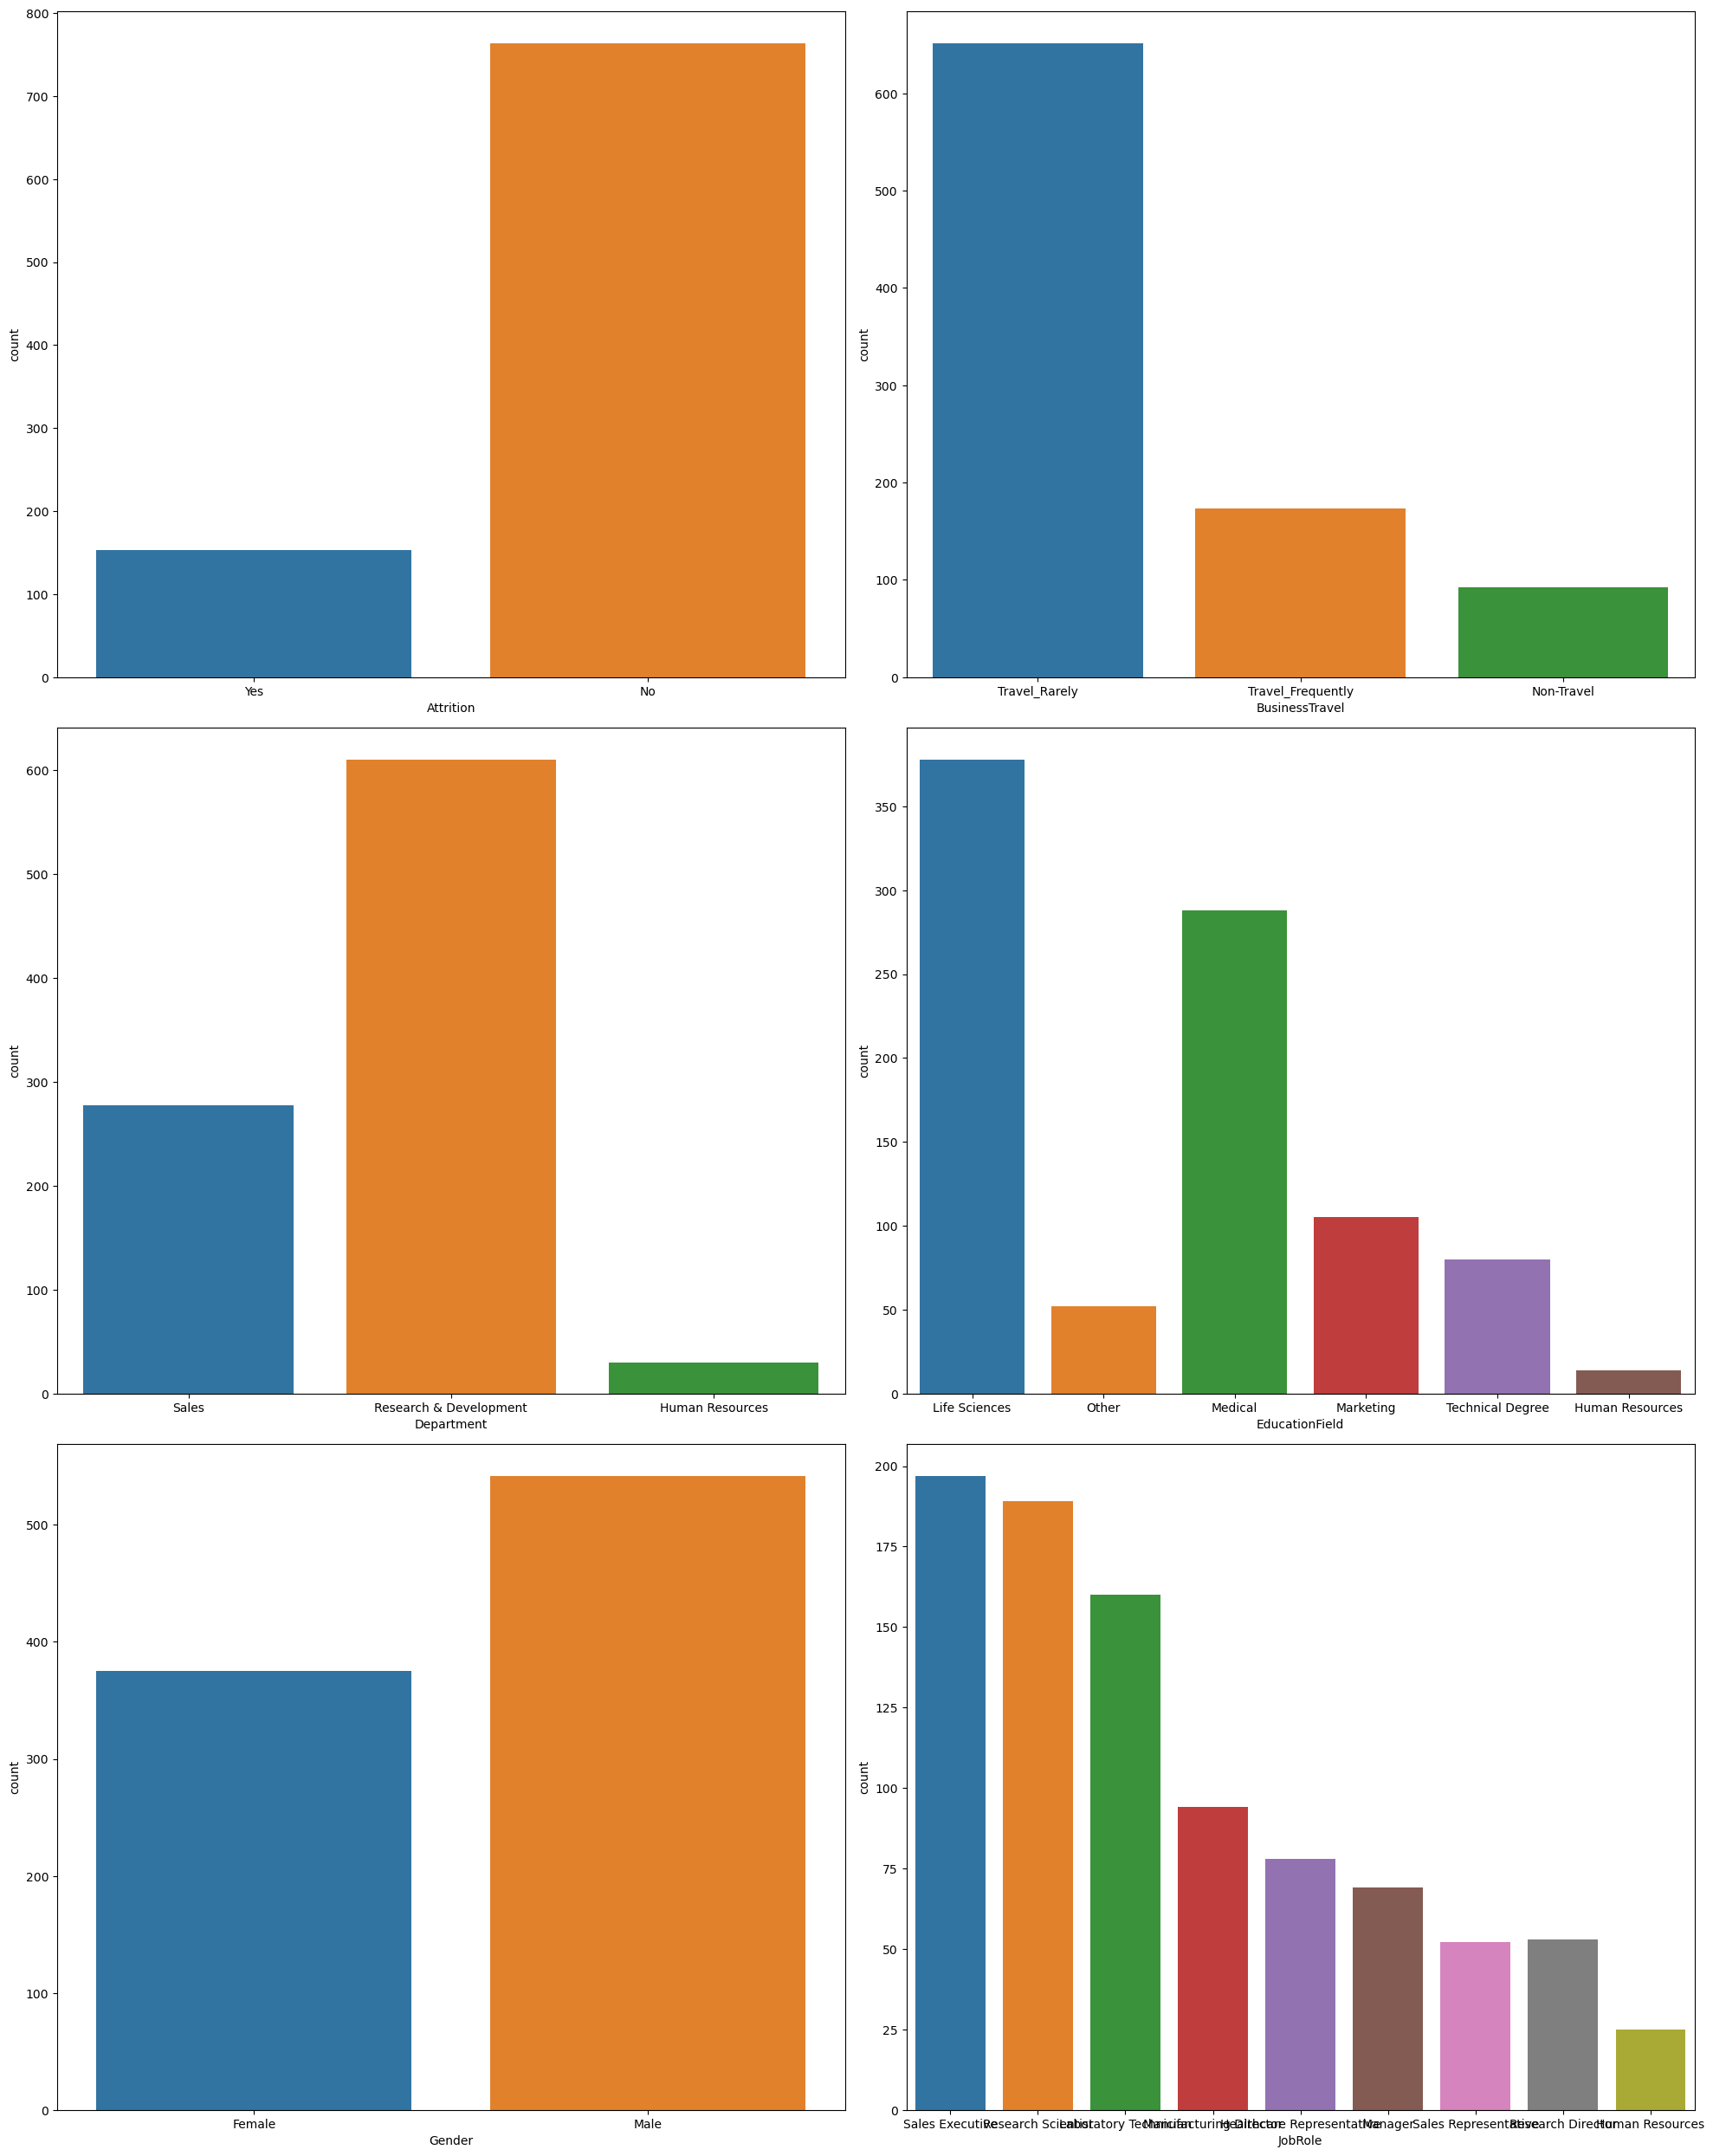

In [80]:
#Univarient Analysis for categorical column:
fig, ax = plt.subplots(3,2)
for i, v in zip(cat_cols.columns, ax.flatten()):
    sns.countplot(x = df[i], ax = v)
plt.tight_layout()
plt.show()

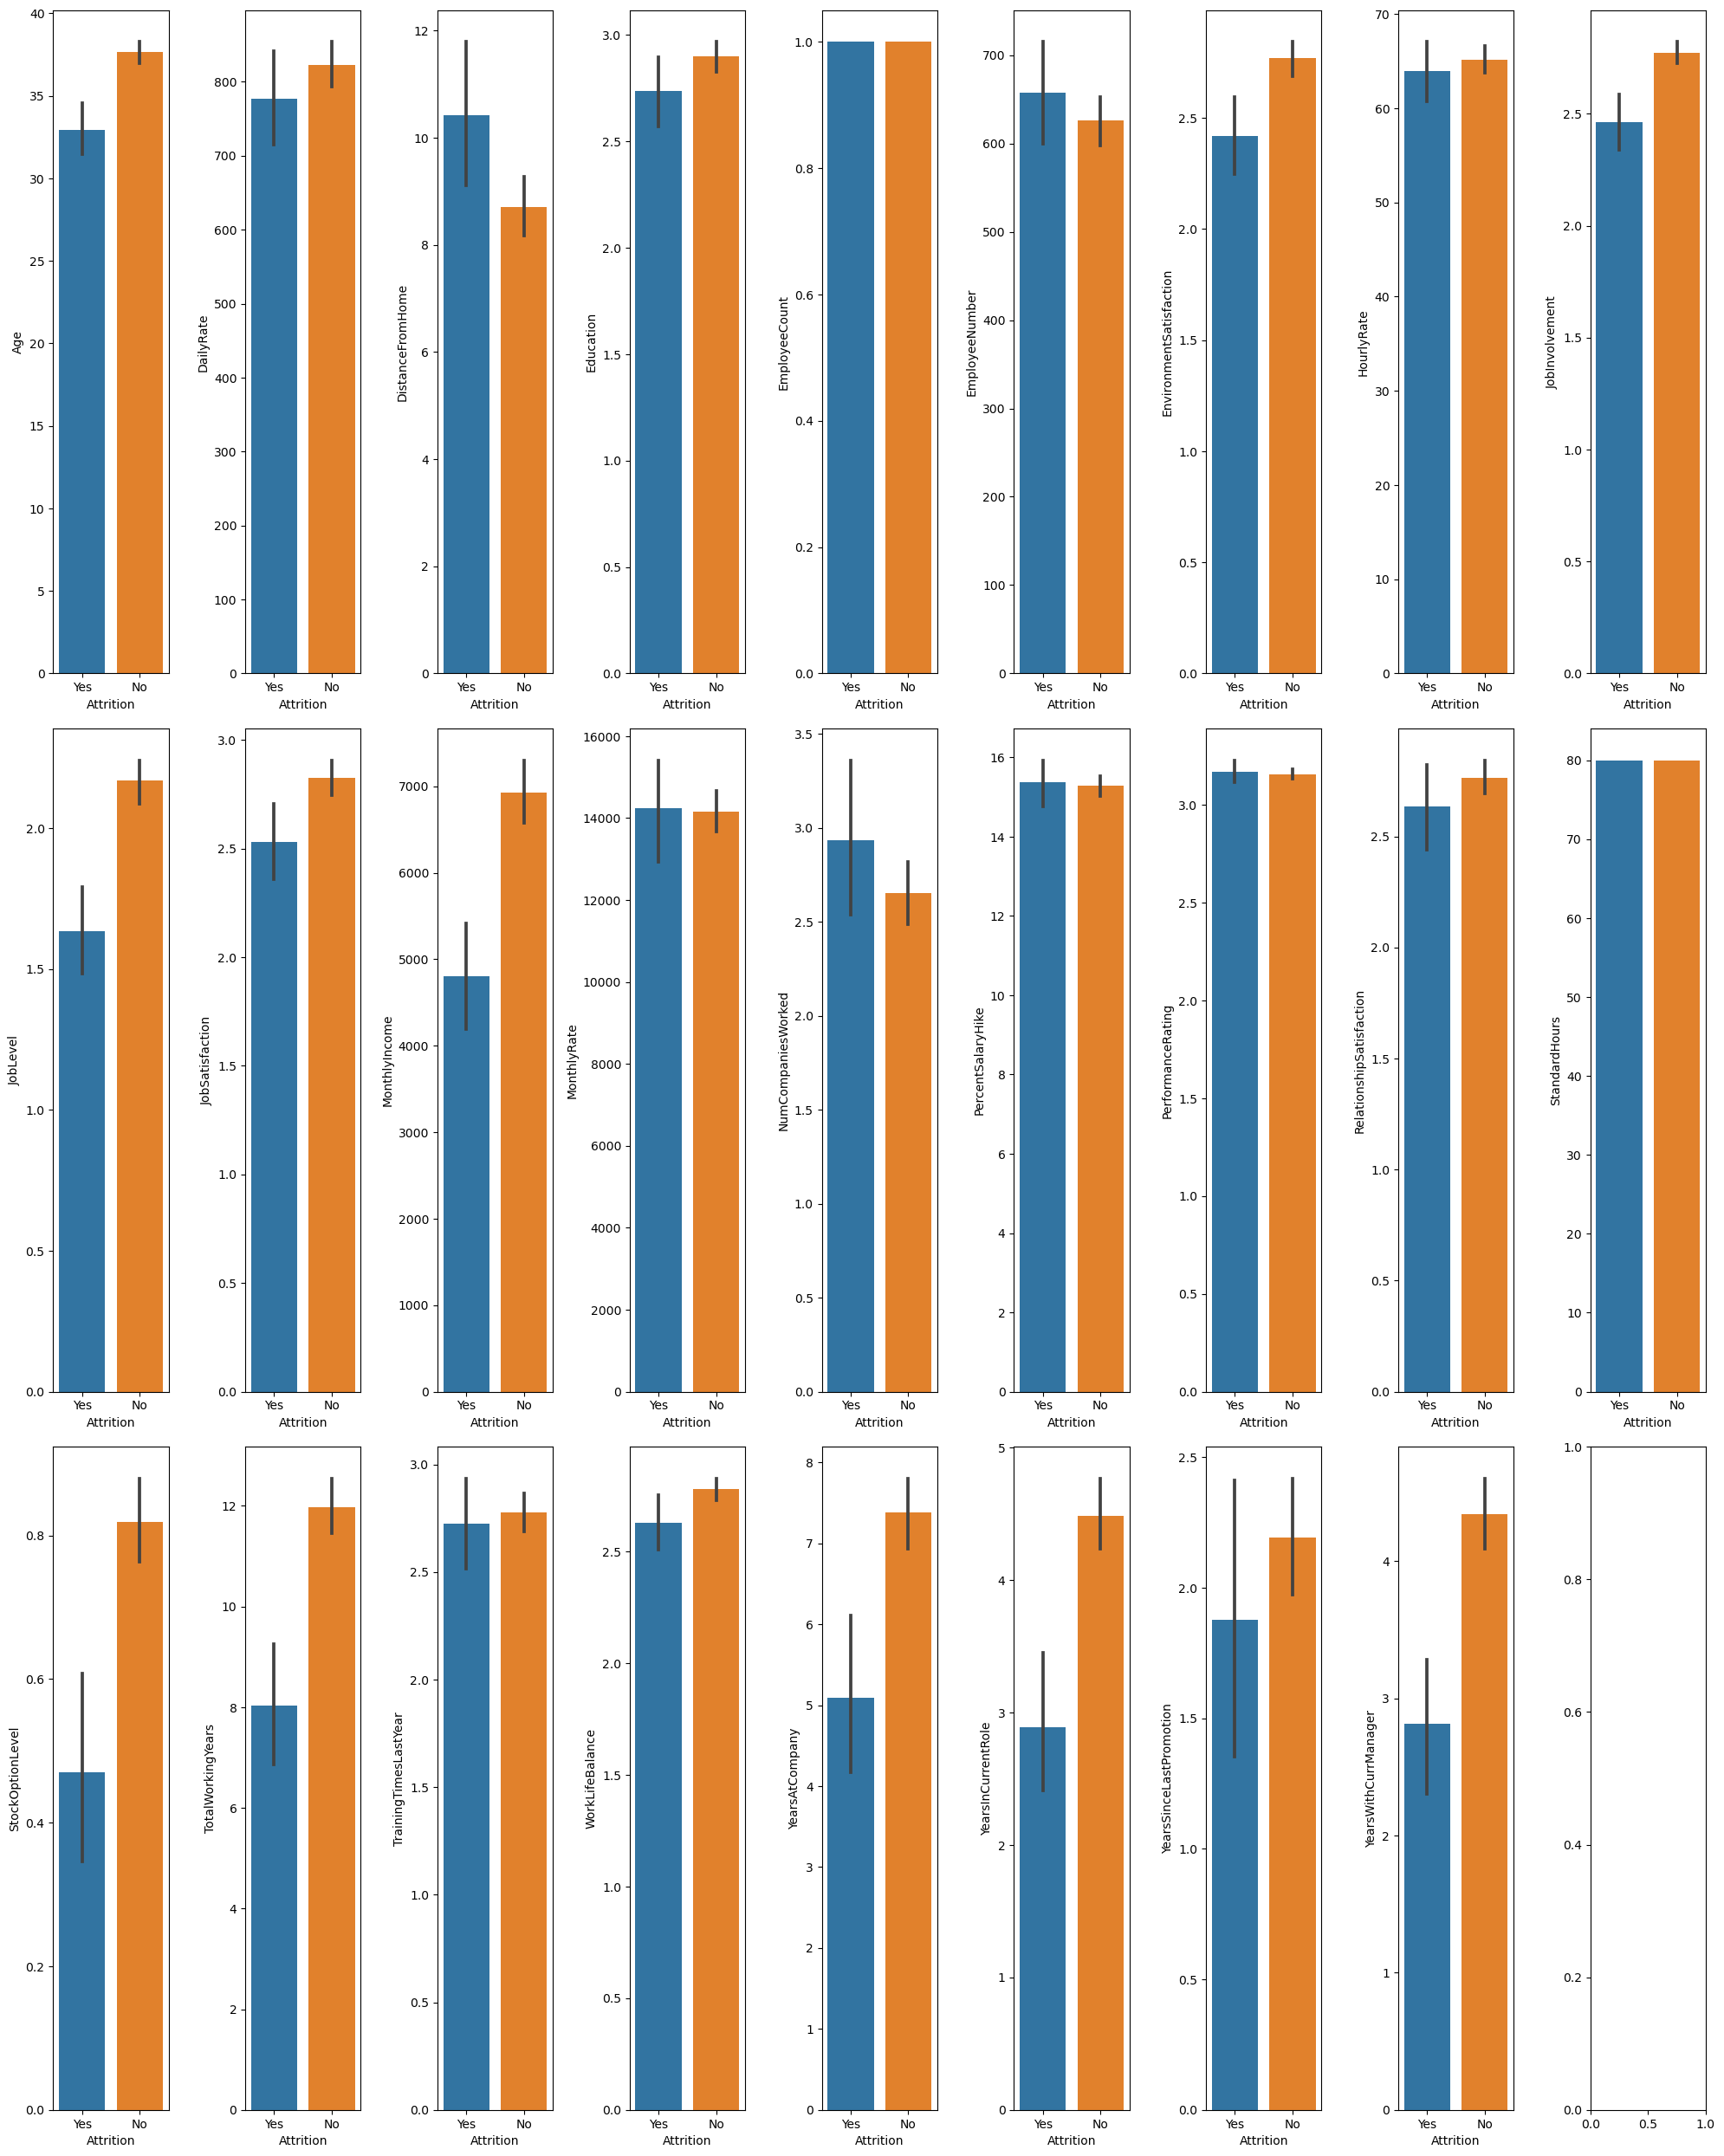

In [81]:
#Bivarient Analysis for Numeric vs categoric columns:
fig, ax = plt.subplots(3,9)
for i,v in zip(num_cols, ax.flatten()):
    sns.barplot(x = df['Attrition'], y = df[i], ax = v)
plt.tight_layout()
plt.show()

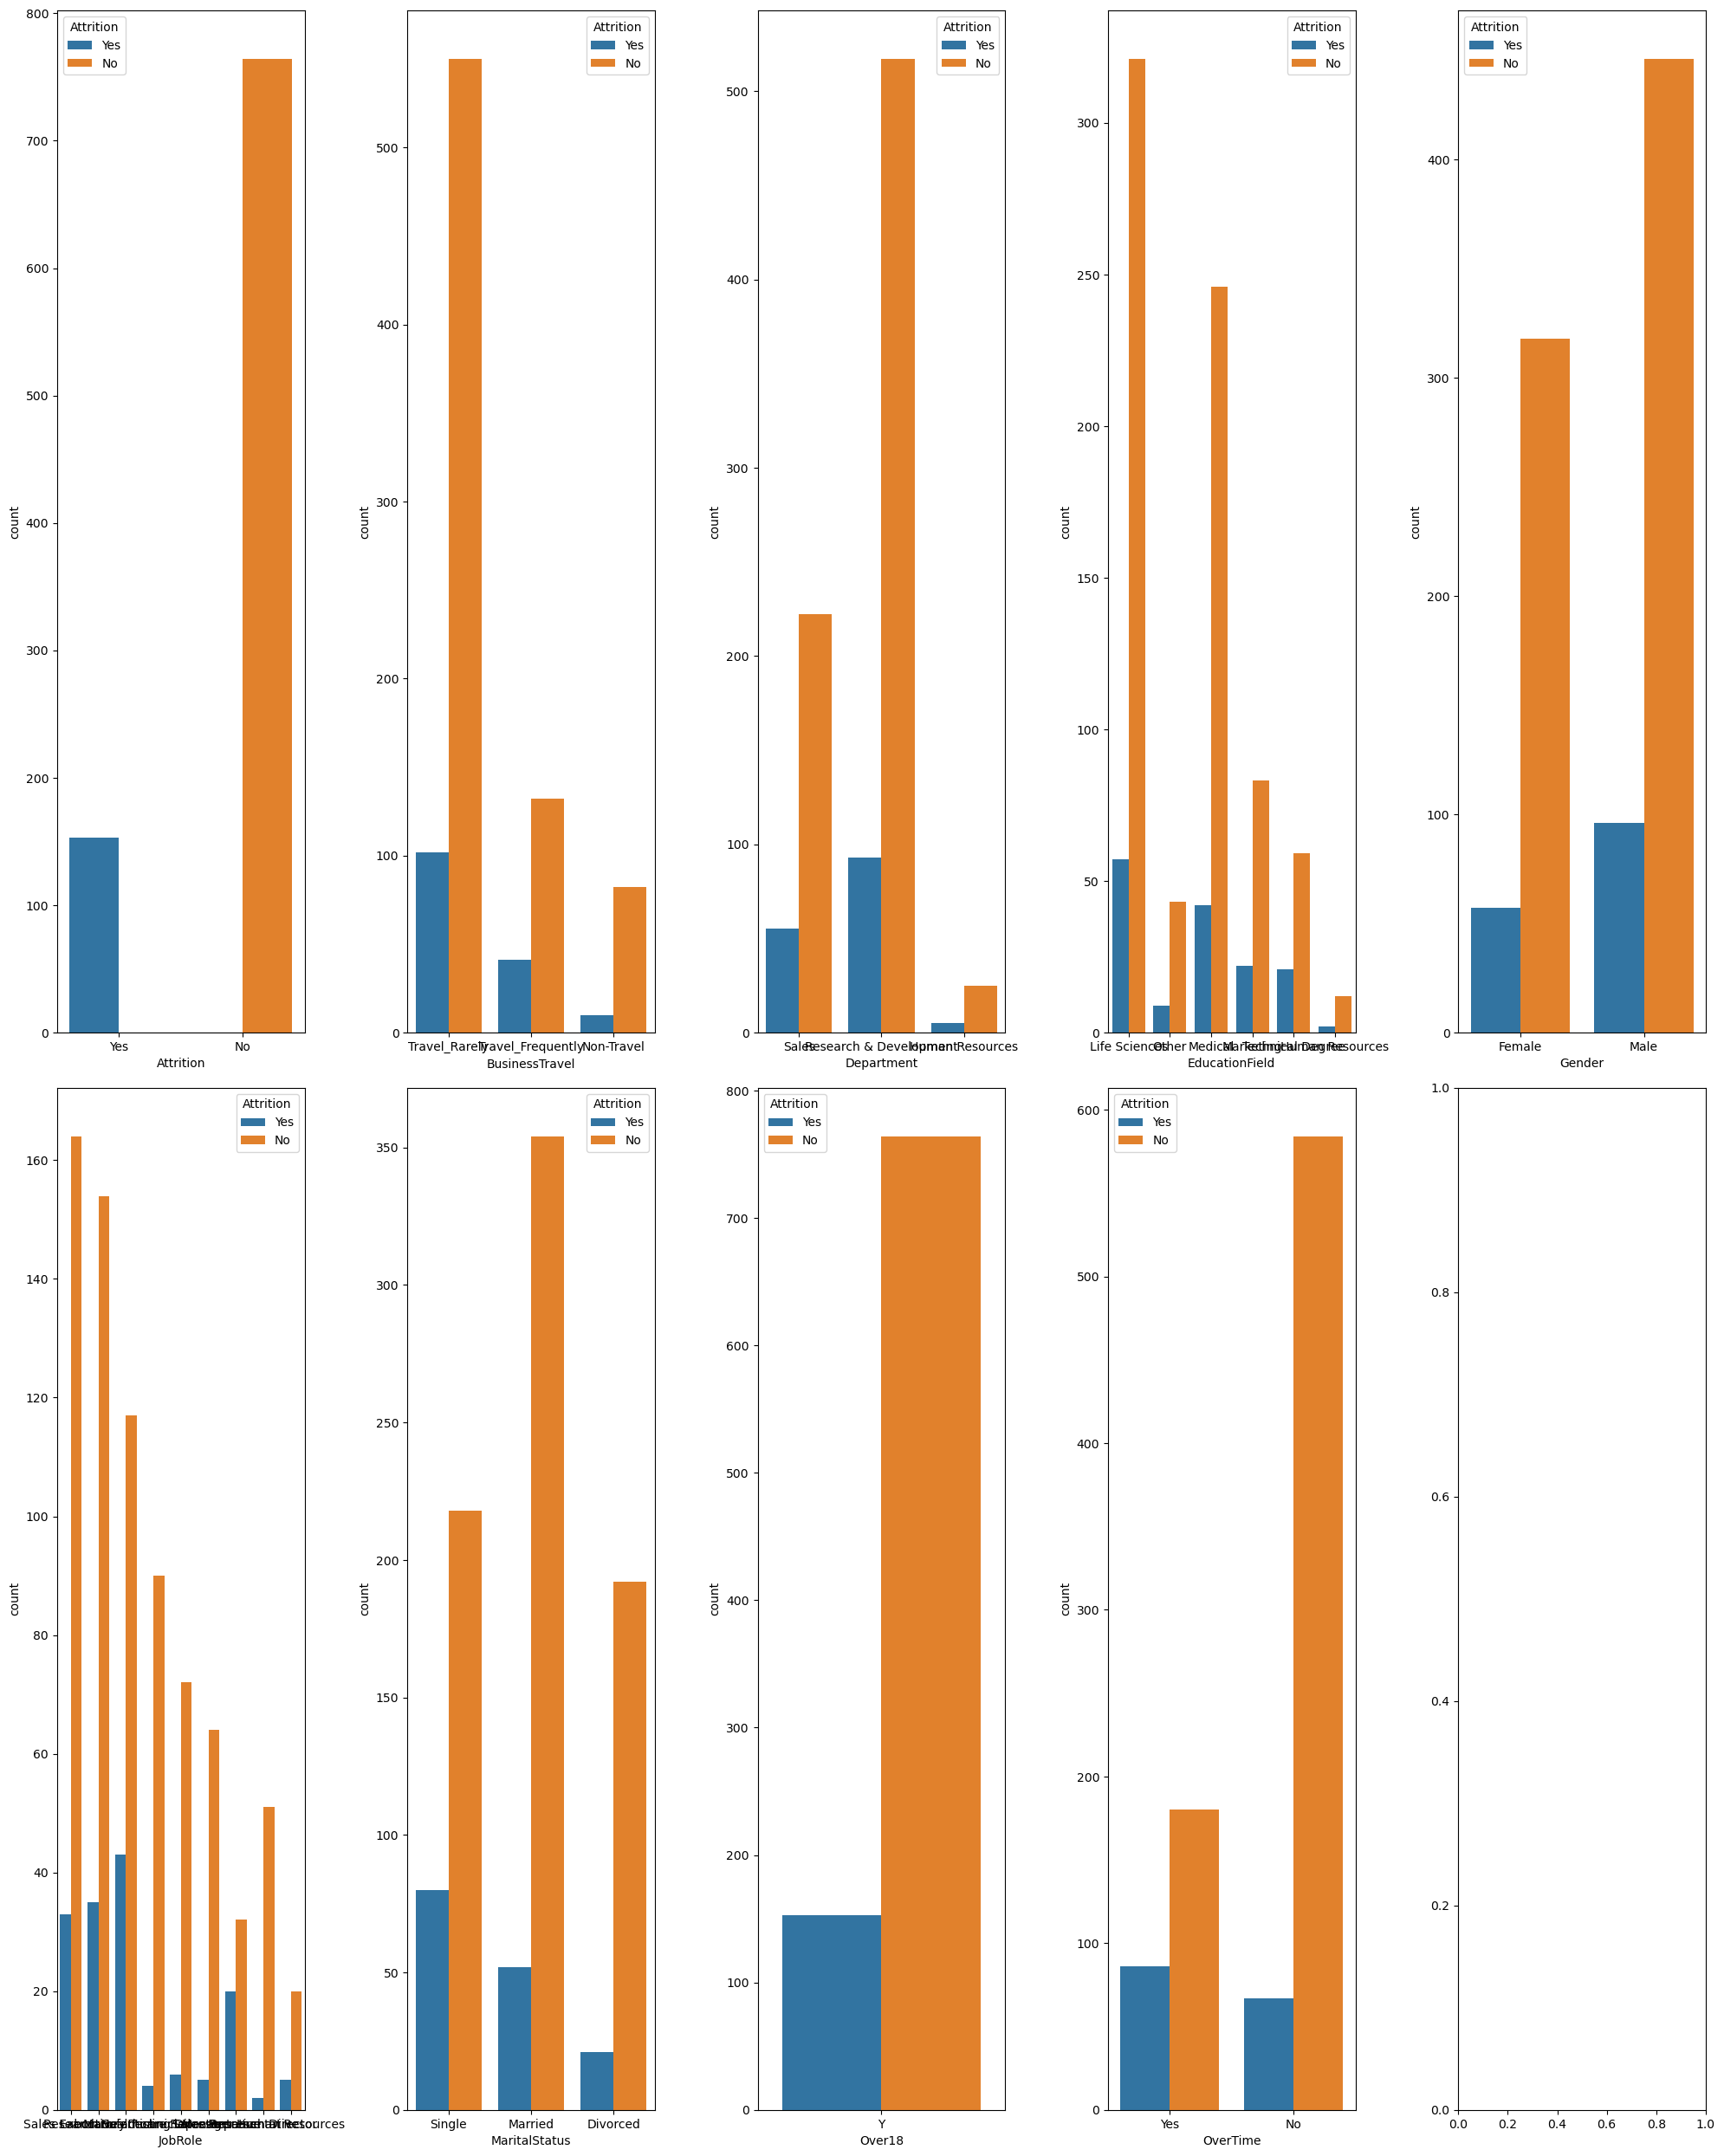

In [82]:
#Bivarient Analysis for categoric vs categoric columns:
fig, ax = plt.subplots(2,5)
for i,v in zip(cat_cols, ax.flatten()):
    sns.countplot(x = df[i], hue = df['Attrition'], ax = v)
plt.tight_layout()
plt.show()

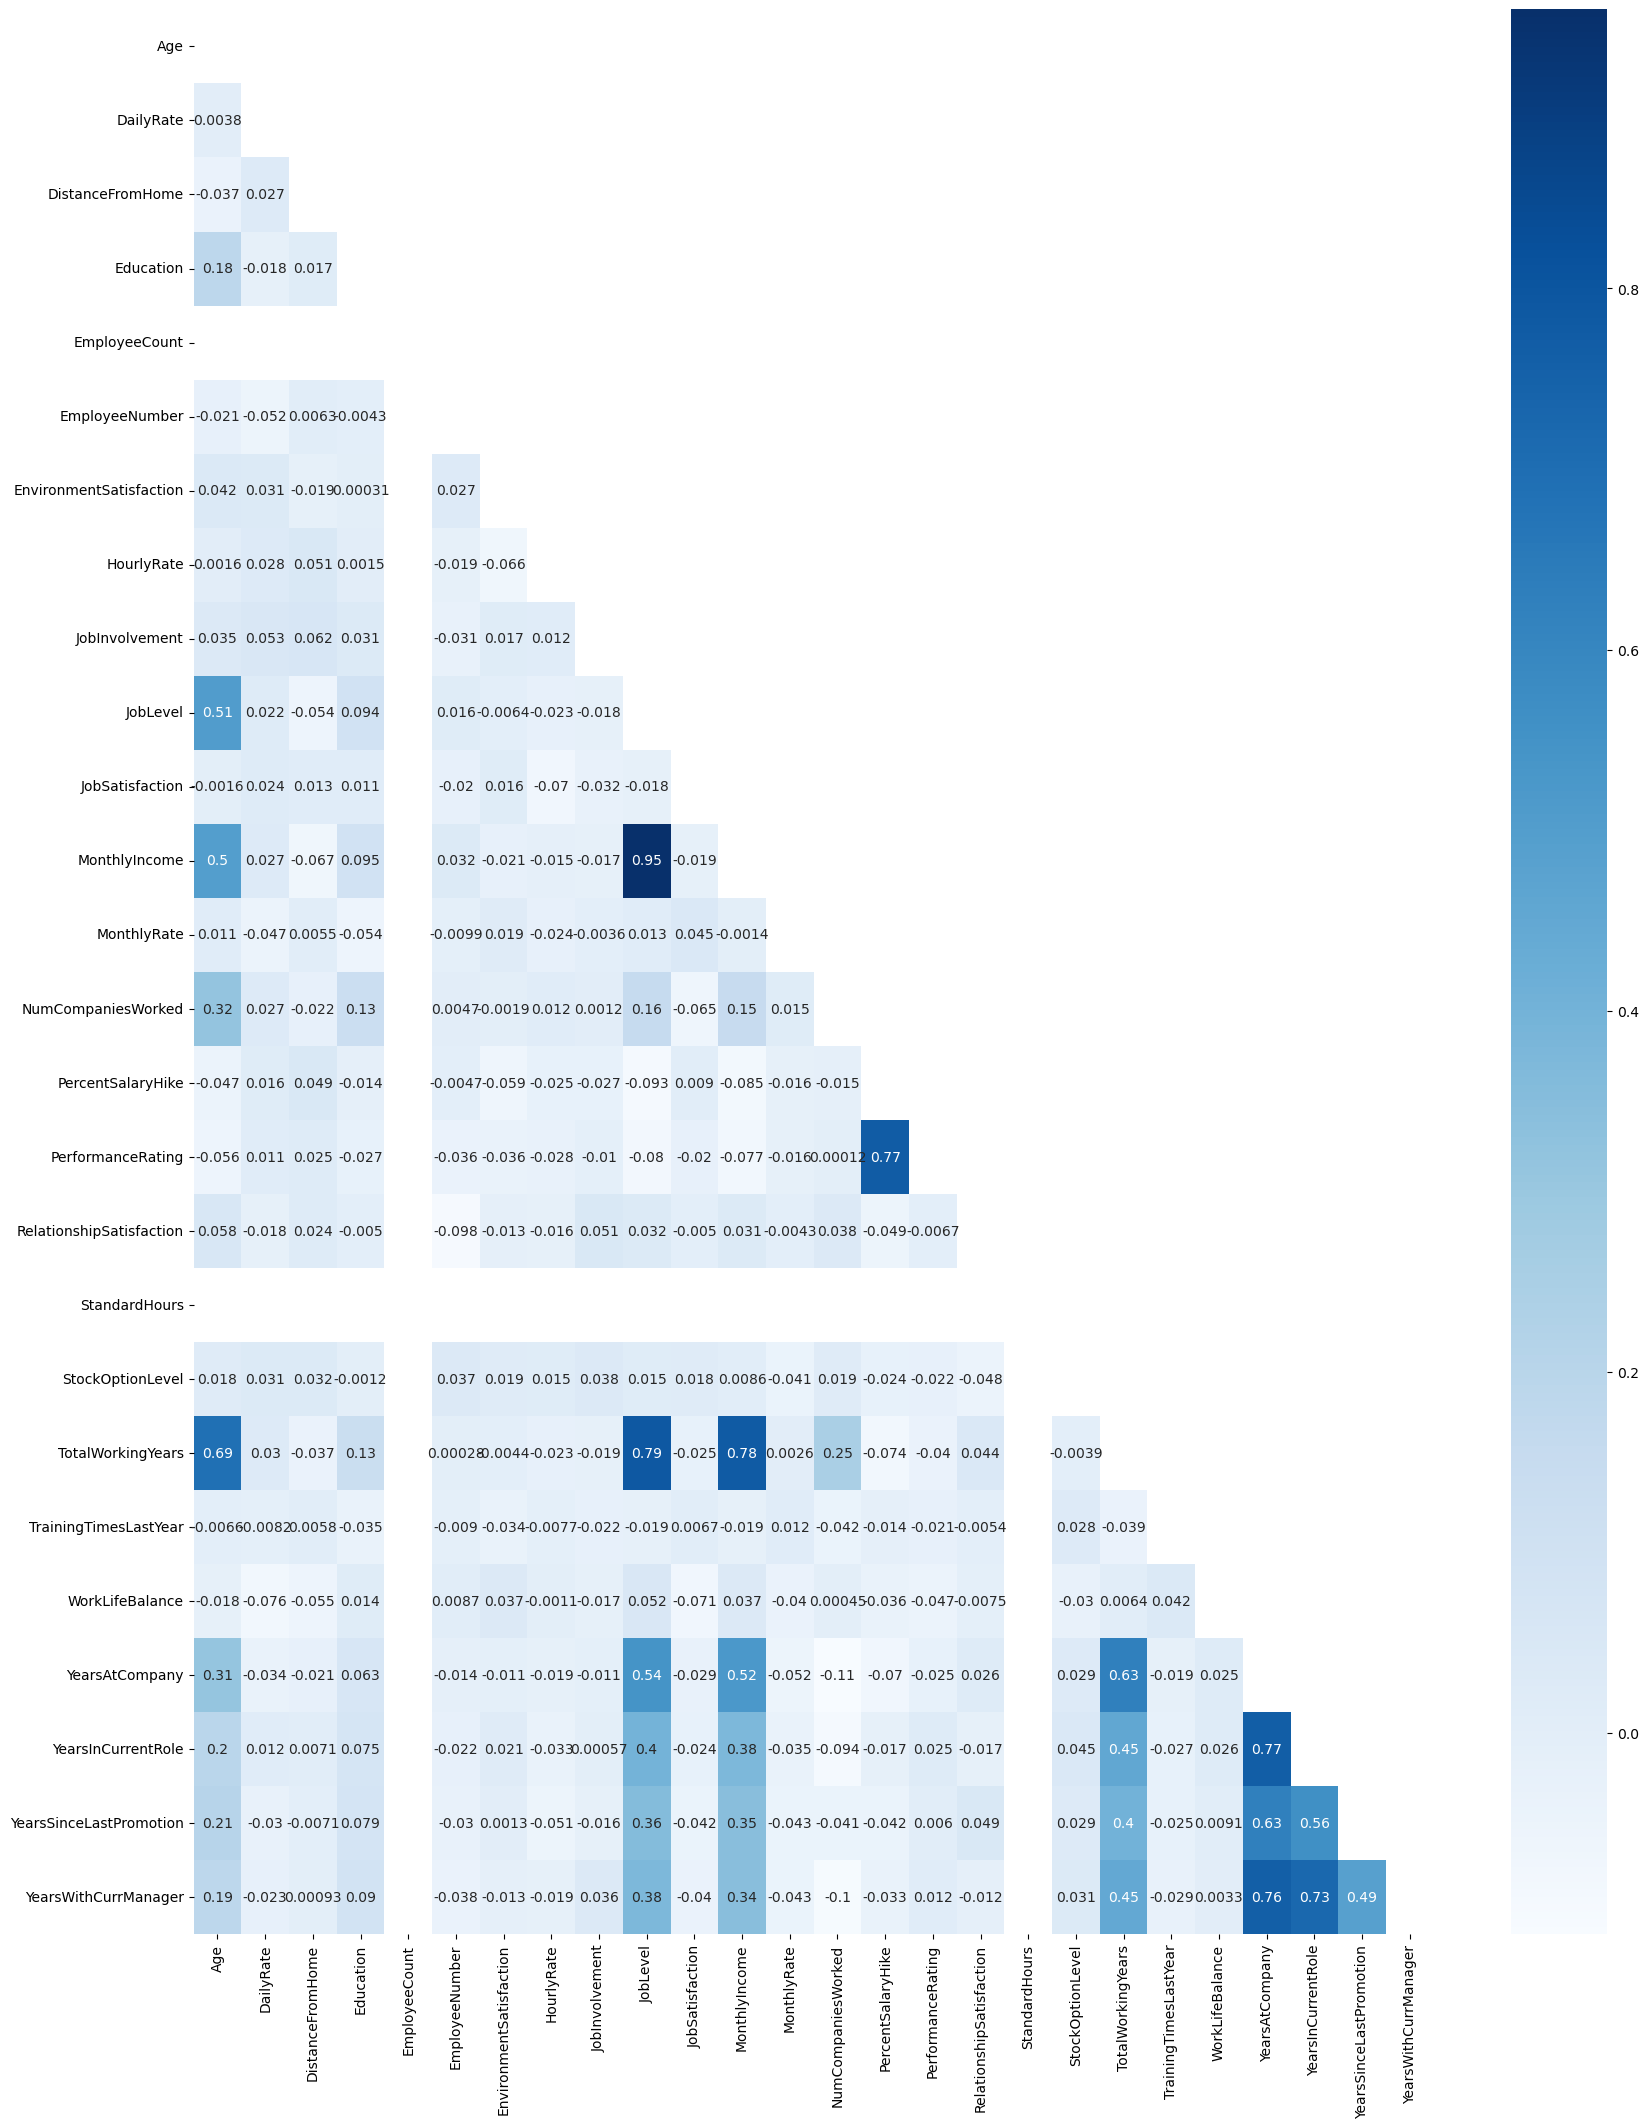

In [83]:
# Multivarient Analysis:
sns.heatmap(df.corr(), annot = True, cmap = 'Blues', mask = np.triu(df.corr()))
plt.show()

In [84]:
# Transformation:
pt = PowerTransformer()
for i in num_cols:
    df[i] = pt.fit_transform(df[[i]])


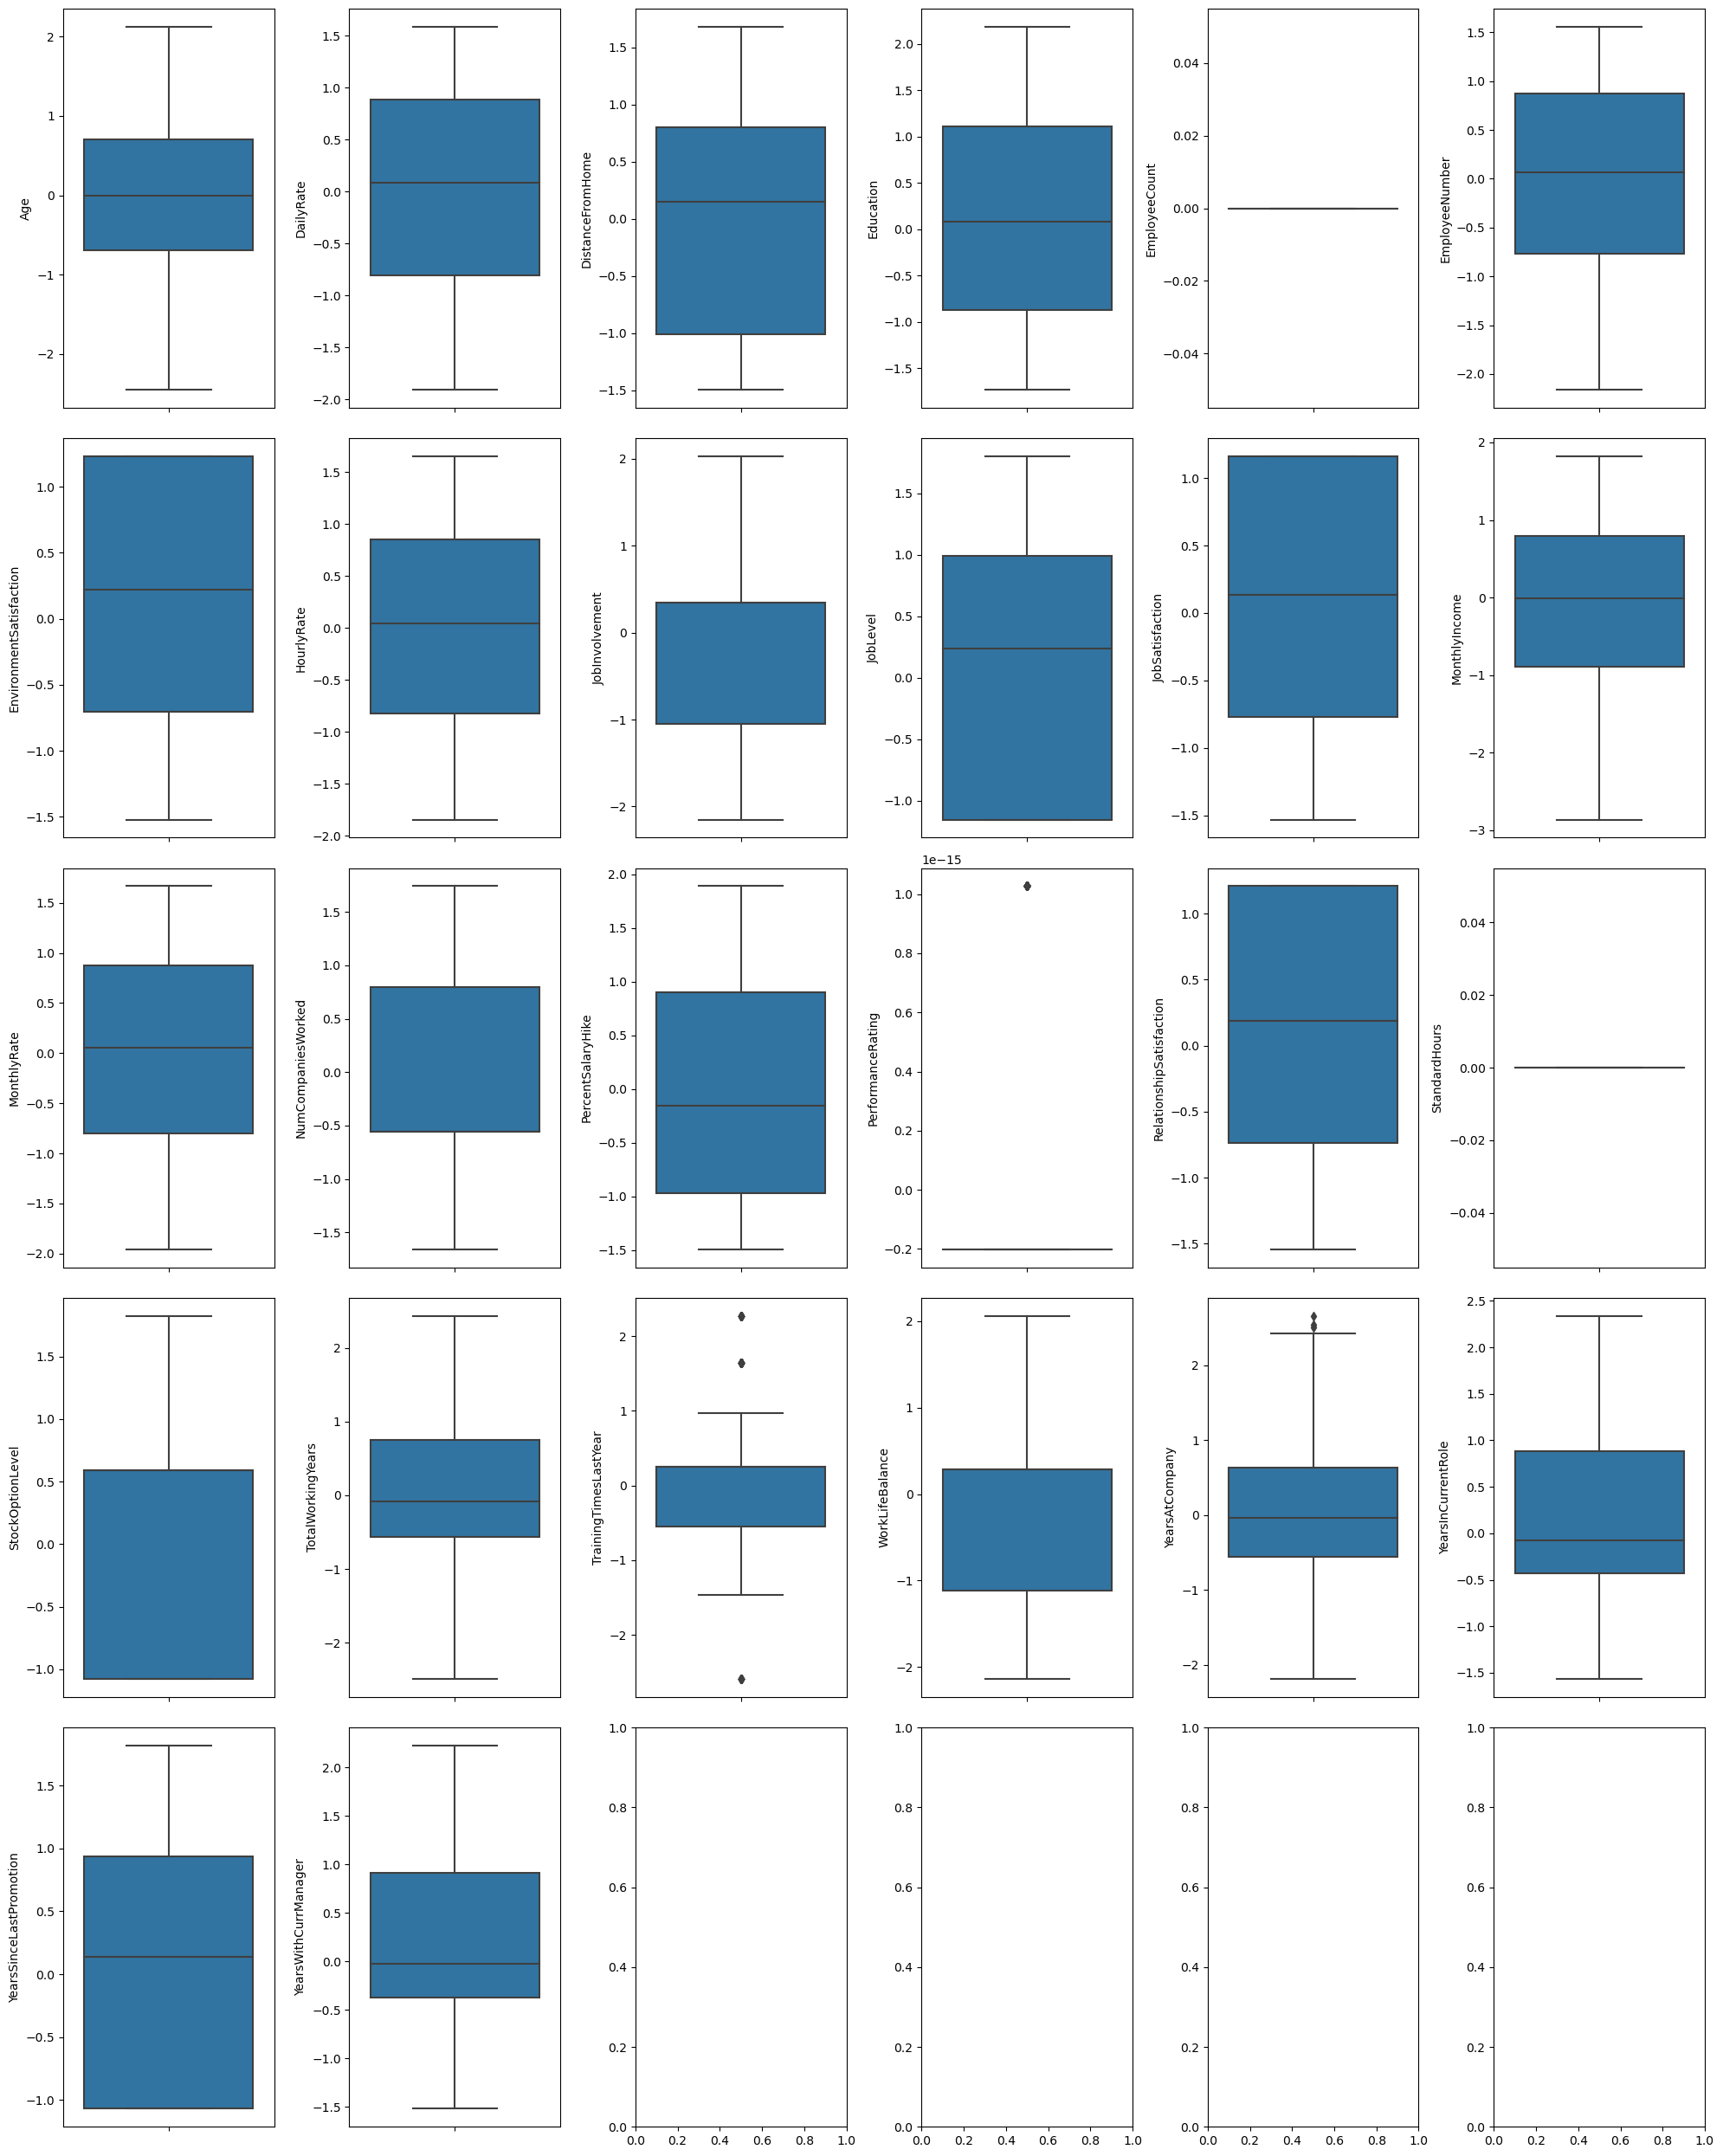

In [85]:
# Outlier Treatment after doing transformation:
fig, ax = plt.subplots(5,6)
for i, v in zip(num_cols, ax.flatten()):
    sns.boxplot(y = df[i], ax = v)
plt.tight_layout()
plt.show()

In [86]:
# Encoding
# To check for unique values in categorical columns to do the encoding:
for i in cat_cols:
    print(i, df[i].unique())


Attrition ['Yes' 'No']
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department ['Sales' 'Research & Development' 'Human Resources']
EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender ['Female' 'Male']
JobRole ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus ['Single' 'Married' 'Divorced']
Over18 ['Y']
OverTime ['Yes' 'No']


In [87]:
# Nominal for dummy
# ordinal for ordinal
df['Attrition'].replace({'Yes': 1, 'No':0}, inplace = True)

# df_col = pd.get_dummies(df['col'], drop_first = True)
# df = pd.concat([df,df_col], axis = 1)
# df.drop(columns = 'col', inplace = True)

# df['col'].value_counts()
# oe = OrdinalEncoder(categories = [['cat1','cat2','cat3']])
# df['col'] = oe.fit_transform(df[['col']])

In [88]:
df['BusinessTravel'].value_counts()
oe = OrdinalEncoder(categories = [['Non-Travel','Travel_Frequently','Travel_Rarely']])
df['BusinessTravel'] = oe.fit_transform(df[['BusinessTravel']])

In [89]:
df['Department'].value_counts()
oe = OrdinalEncoder(categories = [['Human Resources','Sales','Research & Development']])
df['Department'] = oe.fit_transform(df[['Department']])

In [90]:
df['EducationField'].value_counts()
oe = OrdinalEncoder(categories = [['Human Resources','Other','Technical Degree','Marketing','Medical','Life Sciences']])
df['EducationField'] = oe.fit_transform(df[['EducationField']])

In [91]:
df['Gender'].value_counts()
oe = OrdinalEncoder(categories = [['Female','Male']])
df['Gender'] = oe.fit_transform(df[['Gender']])

In [92]:
df['JobRole'].value_counts()
oe = OrdinalEncoder(categories = [['Human Resources','Research Director','Sales Representative', 'Manager',
                                  'Healthcare Representative','Manufacturing Director','Laboratory Technician',
                                  'Research Scientist','Sales Executive']])
df['JobRole'] = oe.fit_transform(df[['JobRole']])

In [93]:
oe = OrdinalEncoder(categories = [['Divorced','Single','Married']])
df['MaritalStatus'] = oe.fit_transform(df[['MaritalStatus']])

In [94]:
oe = OrdinalEncoder(categories = [['Y']])
df['Over18'] = oe.fit_transform(df[['Over18']])

In [95]:
oe = OrdinalEncoder(categories = [['Yes','No']])
df['OverTime'] = oe.fit_transform(df[['OverTime']])

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       917 non-null    float64
 1   Attrition                 917 non-null    int64  
 2   BusinessTravel            917 non-null    float64
 3   DailyRate                 917 non-null    float64
 4   Department                917 non-null    float64
 5   DistanceFromHome          917 non-null    float64
 6   Education                 917 non-null    float64
 7   EducationField            917 non-null    float64
 8   EmployeeCount             917 non-null    float64
 9   EmployeeNumber            917 non-null    float64
 10  EnvironmentSatisfaction   917 non-null    float64
 11  Gender                    917 non-null    float64
 12  HourlyRate                917 non-null    float64
 13  JobInvolvement            917 non-null    float64
 14  JobLevel  

In [97]:
# SMOTE for data imbalance:
x = df.drop(columns = 'Attrition')
y = df['Attrition']
x_resampled, y_resampled = SMOTE().fit_resample(x,y)
y_resampled.value_counts(normalize = True)

1    0.5
0    0.5
Name: Attrition, dtype: float64

### 5.	Split dataset into train and test (70:30) (5 marks)
a.	Are both train and test representative of the overall data? How would you ascertain this statistically?


In [98]:
xtrain, xtest, ytrain, ytest = train_test_split(x_resampled, y_resampled, random_state = 42, test_size = 0.30)

In [99]:
ss = StandardScaler()
for i in num_cols:
    xtrain[i] = ss.fit_transform(xtrain[[i]])
    xtest[i] = ss.transform(xtest[[i]])

### 6.	Fit a base model and explain the reason of selecting that model. Please write your key observations (15 marks) 

a.	What is the overall Accuracy? Please comment on whether it is good or not. 

b.	What is Precision, Recall and F1 Score and what will be the optimization objective keeping in mind the problem statement.

c.	Which variables are significant?

d.	What is Cohen’s Kappa Value and what inference do you make from the model

e.	Which other key model output parameters do you want to look at? 


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       917 non-null    float64
 1   Attrition                 917 non-null    int64  
 2   BusinessTravel            917 non-null    float64
 3   DailyRate                 917 non-null    float64
 4   Department                917 non-null    float64
 5   DistanceFromHome          917 non-null    float64
 6   Education                 917 non-null    float64
 7   EducationField            917 non-null    float64
 8   EmployeeCount             917 non-null    float64
 9   EmployeeNumber            917 non-null    float64
 10  EnvironmentSatisfaction   917 non-null    float64
 11  Gender                    917 non-null    float64
 12  HourlyRate                917 non-null    float64
 13  JobInvolvement            917 non-null    float64
 14  JobLevel  

In [102]:
model_gm = sma.GLM(ytrain, sma.add_constant(xtrain)).fit()
model_gm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1069
Model:                            GLM   Df Residuals:                     1037
Model Family:                Gaussian   Df Model:                           31
Link Function:               identity   Scale:                         0.15651
Method:                          IRLS   Log-Likelihood:                -509.31
Date:                Thu, 04 Apr 2024   Deviance:                       162.30
Time:                        13:01:31   Pearson chi2:                     162.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4656
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.8382      0.074     11.300      0.000       0.693       0.984
Age                         -0.0555      0.019     -2.871      0.004      -0.093      -0.018
BusinessTravel              -0.0123      0.020     -0.600      0.548      -0.052       0.028
DailyRate                   -0.0334      0.013     -2.651      0.008      -0.058      -0.009
Department                  -0.0424      0.026     -1.625      0.104      -0.094       0.009
DistanceFromHome             0.0423      0.012      3.426      0.001       0.018       0.066
Education                   -0.0052      0.013     -0.409      0.682      -0.030       0.020
EducationField              -0.0278      0.011     -2.522      0.012      -0.049      -0.006
EmployeeCount             4.997e-16      2e-16      2.498      0.013    1.08e-16    8.92e-16
EmployeeNumber               0.0114      0.013      0.908      0.364      -0.013       0.036
EnvironmentSatisfaction     -0.0720      0.013     -5.696      0.000      -0.097      -0.047
Gender                       0.0638      0.028      2.319      0.020       0.010       0.118
HourlyRate                  -0.0220      0.013     -1.743      0.081      -0.047       0.003
JobInvolvement              -0.0707      0.012     -5.691      0.000      -0.095      -0.046
JobLevel                    -0.0298      0.035     -0.860      0.390      -0.098       0.038
JobRole                     -0.0009      0.006     -0.163      0.871      -0.012       0.010
JobSatisfaction             -0.0681      0.013     -5.392      0.000      -0.093      -0.043
MaritalStatus                0.0044      0.018      0.247      0.805      -0.030       0.039
MonthlyIncome               -0.0147      0.035     -0.415      0.678      -0.084       0.055
MonthlyRate                  0.0097      0.013      0.763      0.445      -0.015       0.035
NumCompaniesWorked           0.0775      0.015      5.255      0.000       0.049       0.106
Over18                     1.73e-18   1.21e-17      0.143      0.886    -2.2e-17    2.54e-17
OverTime                    -0.3148      0.028    -11.339      0.000      -0.369      -0.260
PercentSalaryHike           -0.0191      0.017     -1.130      0.258      -0.052       0.014
PerformanceRating           -0.0167      0.017     -0.988      0.323      -0.050       0.016
RelationshipSatisfaction    -0.0320      0.013     -2.523      0.012      -0.057      -0.007
StandardHours             7.039e-17   6.24e-18     11.274      0.000    5.82e-17    8.26e-17
StockOptionLevel            -0.1108      0.013     -8.795      0.000      -0.136      -0.086
TotalWorkingYears           -0.0750      0.030     -2.465      0.014      -0.135      -0.015
TrainingTimesLastYear        0.0170      0.012      1.382      0.167      -0.007       0.041
WorkLifeBalanc

In [103]:
pred_train_prob = model_gm.predict(sma.add_constant(xtrain))
pred_test_prob = model_gm.predict(sma.add_constant(xtest))

In [104]:
pred_train_prob

1466    0.580480
1269    1.122557
126    -0.189149
327     0.662853
292     0.437327
          ...   
1130    0.775397
1294    0.479160
860     0.616412
1459    0.752581
1126    1.122895
Length: 1069, dtype: float64

In [105]:
ytrain

1466    1
1269    1
126     1
327     1
292     0
       ..
1130    1
1294    1
860     1
1459    1
1126    1
Name: Attrition, Length: 1069, dtype: int64

In [106]:
#train data
fpr, tpr, threshold = roc_curve(ytrain, pred_train_prob)
train_threshold = pd.DataFrame({'FPR':fpr, 'TPR': tpr, 'Threshold':threshold})
train_threshold['Difference'] = train_threshold['TPR'] - train_threshold['FPR']
train_threshold[train_threshold['Difference'] == max(train_threshold['Difference'])]

,FPR,TPR,Threshold,Difference
204,0.242259,0.873077,0.468665,0.630818


In [107]:
#test data
fpr, tpr, threshold = roc_curve(ytrain, pred_train_prob)
test_threshold = pd.DataFrame({'FPR':fpr, 'TPR': tpr, 'Threshold':threshold})
test_threshold['Difference'] = test_threshold['TPR'] - test_threshold['FPR']
test_threshold[test_threshold['Difference'] == max(test_threshold['Difference'])]

,FPR,TPR,Threshold,Difference
204,0.242259,0.873077,0.468665,0.630818


In [108]:
pred_train = [1 if i > 0.498454 else 0 for i in pred_train_prob]
pred_test = [1 if i > 0.498454 else 0 for i in pred_test_prob]
print('Train report\n', classification_report(ytrain, pred_train))
print('Train report\n', classification_report(ytest, pred_test))

Train report
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       549
           1       0.79      0.83      0.81       520

    accuracy                           0.81      1069
   macro avg       0.81      0.81      0.81      1069
weighted avg       0.81      0.81      0.81      1069

Train report
               precision    recall  f1-score   support

           0       0.84      0.81      0.82       215
           1       0.84      0.86      0.85       244

    accuracy                           0.84       459
   macro avg       0.84      0.84      0.84       459
weighted avg       0.84      0.84      0.84       459



<Axes: >

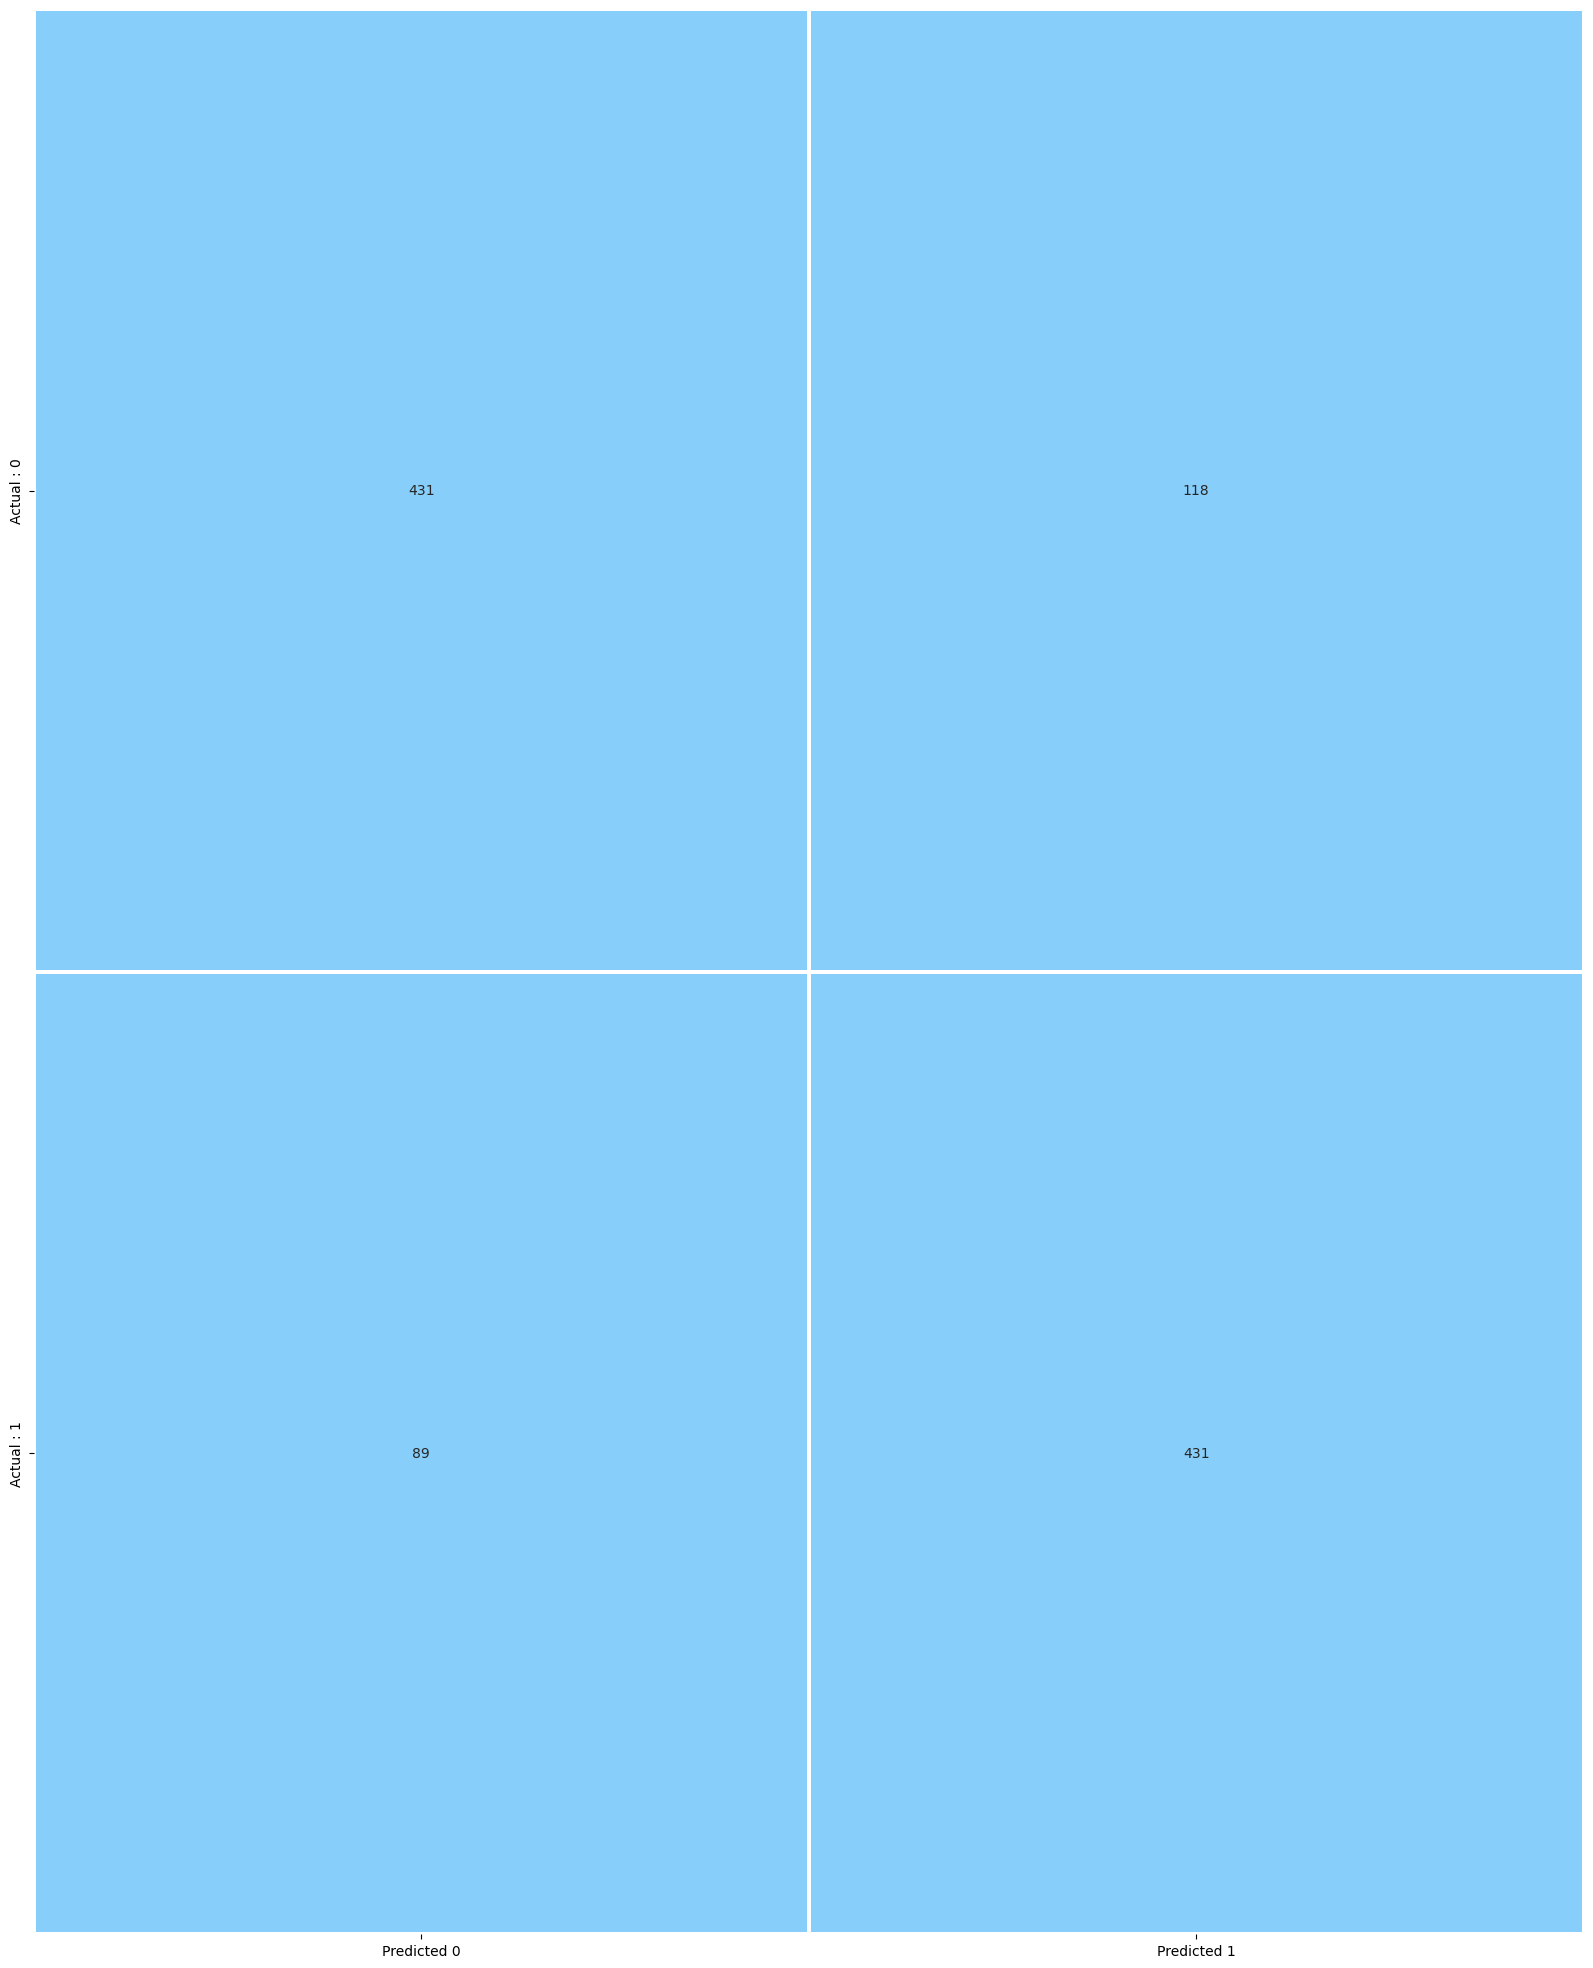

In [109]:
#confusion matrix:
cm = confusion_matrix(ytrain, pred_train)
conf_matrix = pd.DataFrame(data = cm, index = ['Actual : 0','Actual : 1'], columns = ['Predicted 0','Predicted 1'])
sns.heatmap(data = conf_matrix, annot  =True, cbar = False, fmt = 'd', linewidth = 1.5, cmap = ListedColormap(['lightskyblue']))


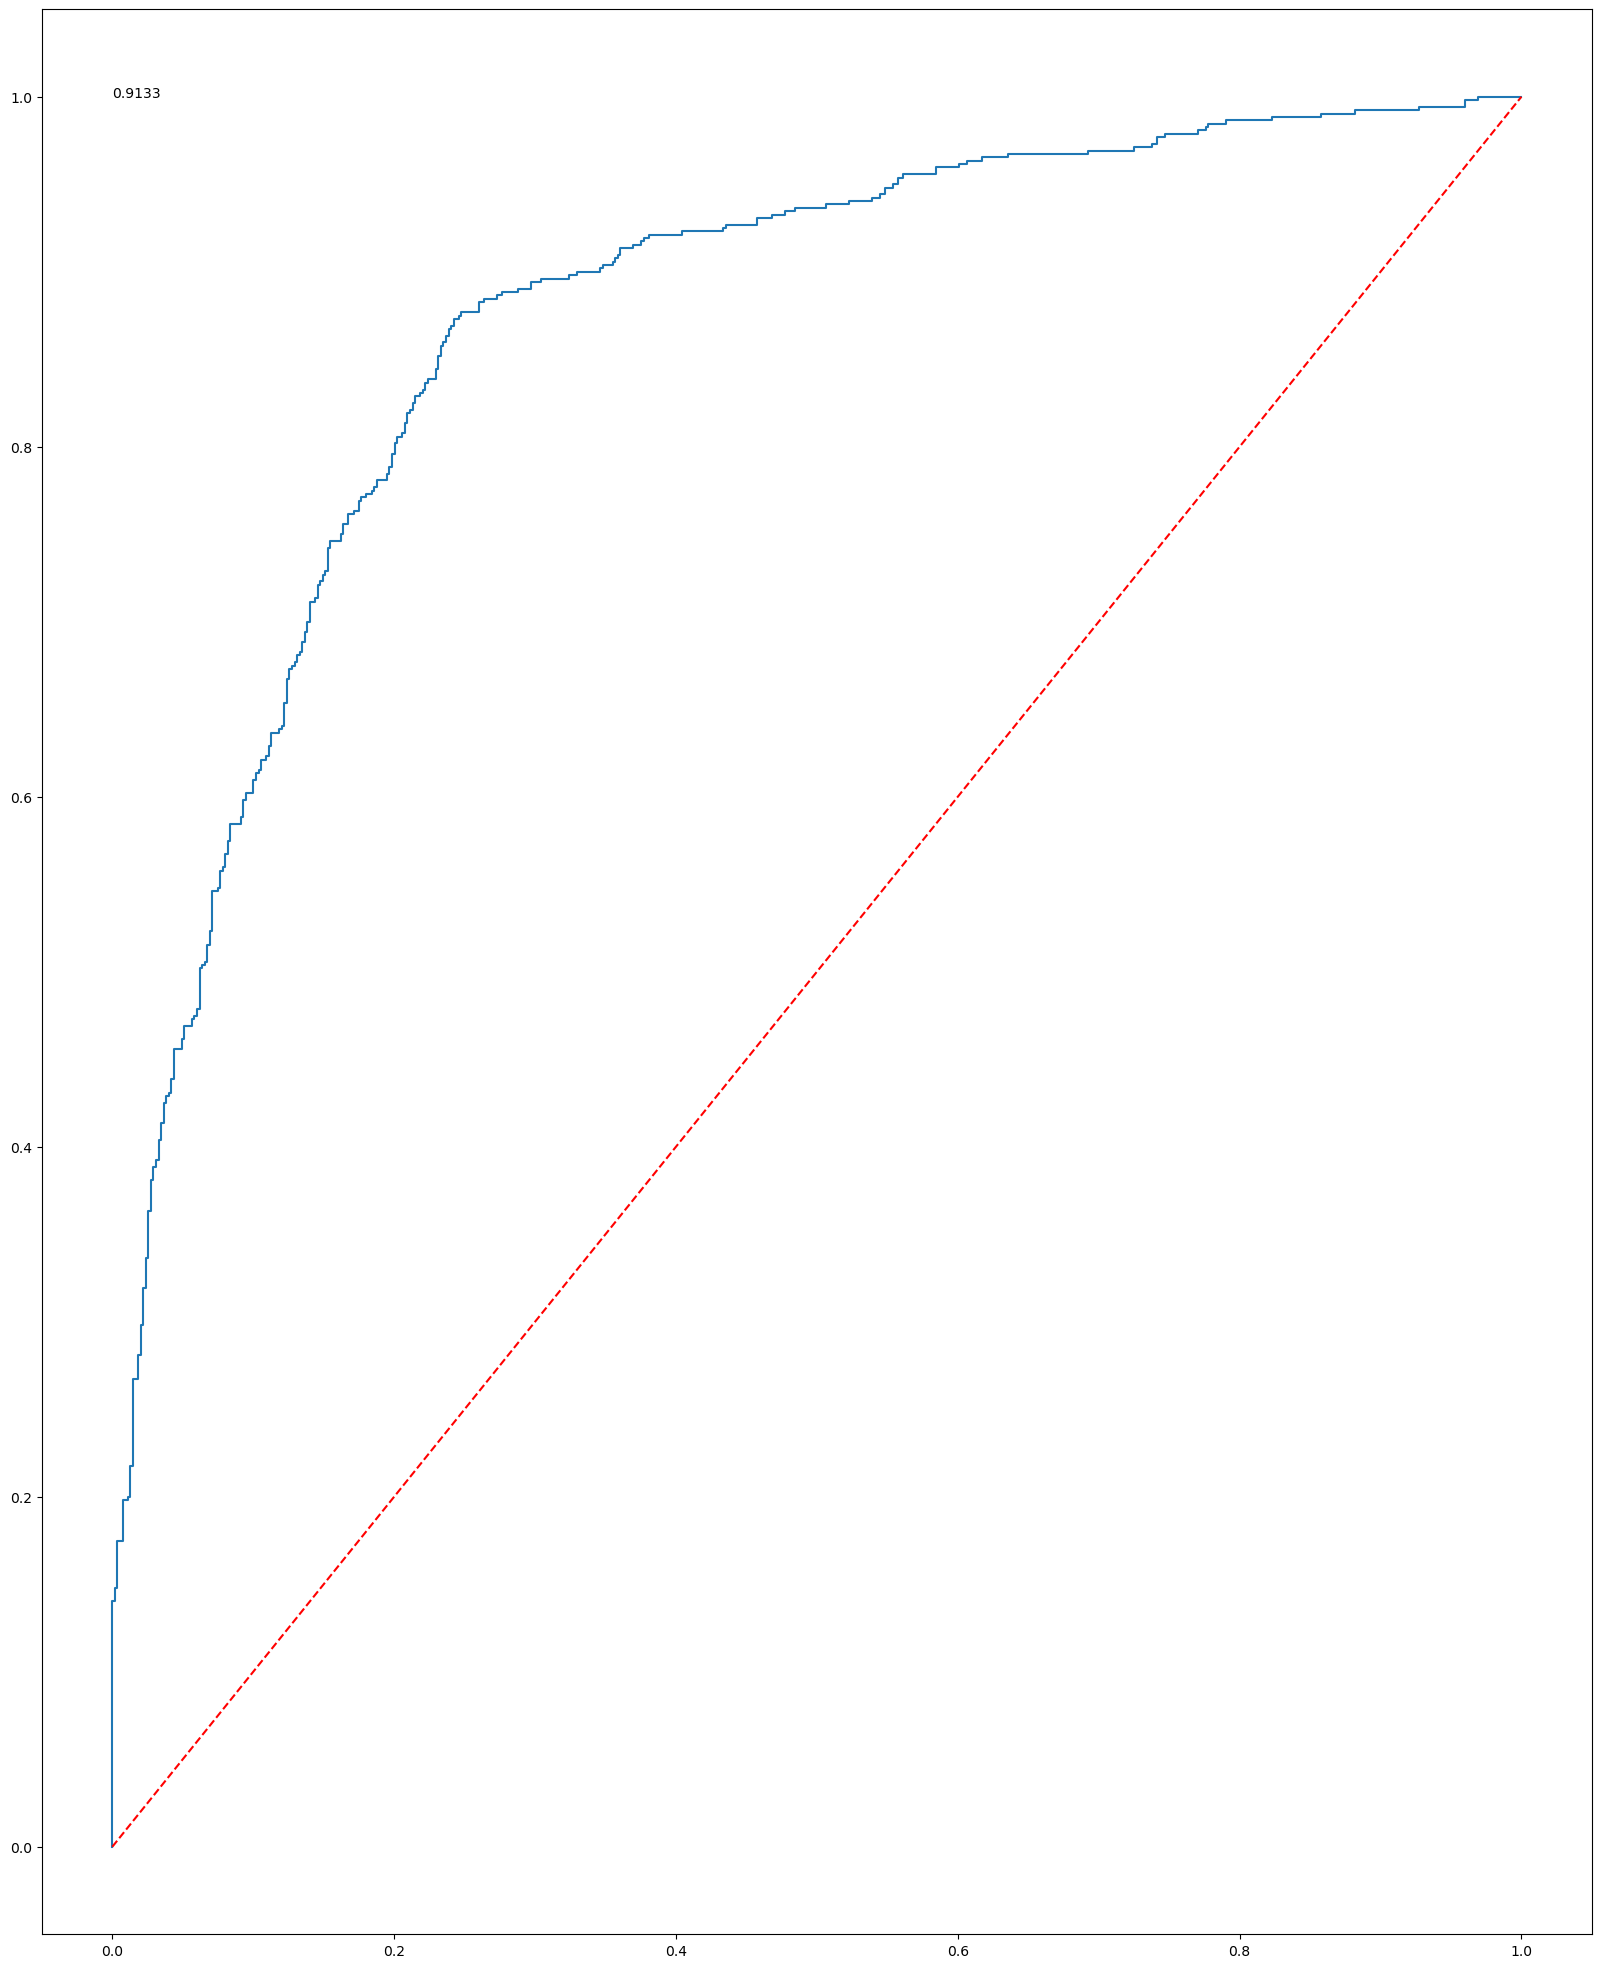

In [110]:
plt.plot(fpr, tpr)
plt.plot([0.0, 1.0], 'r--')
plt.text(x = 0, y = 1, s = round(roc_auc_score(ytest, pred_test_prob), 4))
plt.show()

In [111]:
performance_remarks_df = pd.DataFrame(columns = ['Name','Train_accuracy','Test_accuracy','Train_f1score',
                                                'Test_f1score','Train_Kappa','Test_Kappa','Remarks'])
def model_performance_remarks(model, name, xtrain = xtrain, xtest = xtest):
    global performance_remarks_df
    pred_train = model.predict(xtrain)
    pred_test = model.predict(xtest)
    acc_train = round(accuracy_score(ytrain, pred_train),2)*100
    acc_test = round(accuracy_score(ytest, pred_test),2)*100
    f1_train = f1_score(ytrain, pred_train)
    f1_test = f1_score(ytest, pred_test)
    kappa_train = cohen_kappa_score(ytrain, pred_train)
    kappa_test = cohen_kappa_score(ytest, pred_test)
    #remarks:
    def remark(train, test):
        if name == 'Base Model':
            return 'Base Model'
        else:
            if abs(train - test) > 10 or train > 95:
                return 'Overfit'
            elif train < 80 or test < 76:
                return 'Under Fit'
            else:
                return 'Good fit'
    performance_remarks_df = performance_remarks_df.append({
        'Name': name, 'Train_accuracy':round(acc_train,2)*100, 'Test_accuracy':round(acc_test,2)*100,
        'Train_f1score': f1_train, 'Test_f1score': f1_test,'Train_Kappa':kappa_train, 'Test_Kappa':kappa_test,
        'Remarks':remark(acc_train, acc_test)}, ignore_index = True)
    print('Test report\n', classification_report(ytrain, pred_train))
    print('Train report\n', classification_report(ytest, pred_test))

In [112]:
performance_remarks_df

,Name,Train_accuracy,Test_accuracy,Train_f1score,Test_f1score,Train_Kappa,Test_Kappa,Remarks


In [113]:
model_lr1 = LogisticRegression().fit(xtrain, ytrain)
model_performance_remarks(model_lr1, 'Base Model')

Test report
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       549
           1       0.79      0.82      0.81       520

    accuracy                           0.81      1069
   macro avg       0.81      0.81      0.81      1069
weighted avg       0.81      0.81      0.81      1069

Train report
               precision    recall  f1-score   support

           0       0.83      0.82      0.82       215
           1       0.84      0.85      0.85       244

    accuracy                           0.84       459
   macro avg       0.84      0.84      0.84       459
weighted avg       0.84      0.84      0.84       459



In [114]:
modeldt = DecisionTreeClassifier().fit(xtrain, ytrain)
model_performance_remarks(modeldt, 'Decision Tree')

Test report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       549
           1       1.00      1.00      1.00       520

    accuracy                           1.00      1069
   macro avg       1.00      1.00      1.00      1069
weighted avg       1.00      1.00      1.00      1069

Train report
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       215
           1       0.85      0.88      0.86       244

    accuracy                           0.85       459
   macro avg       0.85      0.85      0.85       459
weighted avg       0.85      0.85      0.85       459



In [115]:
modeldrf = RandomForestClassifier().fit(xtrain, ytrain)
model_performance_remarks(modeldrf, 'Random Forest')

Test report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       549
           1       1.00      1.00      1.00       520

    accuracy                           1.00      1069
   macro avg       1.00      1.00      1.00      1069
weighted avg       1.00      1.00      1.00      1069

Train report
               precision    recall  f1-score   support

           0       0.92      0.99      0.96       215
           1       0.99      0.93      0.96       244

    accuracy                           0.96       459
   macro avg       0.96      0.96      0.96       459
weighted avg       0.96      0.96      0.96       459



In [116]:
modelabc = AdaBoostClassifier().fit(xtrain, ytrain)
model_performance_remarks(modelabc, 'Ada Boost')

Test report
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       549
           1       0.93      0.92      0.92       520

    accuracy                           0.93      1069
   macro avg       0.93      0.93      0.93      1069
weighted avg       0.93      0.93      0.93      1069

Train report
               precision    recall  f1-score   support

           0       0.88      0.89      0.89       215
           1       0.90      0.89      0.90       244

    accuracy                           0.89       459
   macro avg       0.89      0.89      0.89       459
weighted avg       0.89      0.89      0.89       459



In [117]:
modelxgb = XGBClassifier().fit(xtrain, ytrain)
model_performance_remarks(modelxgb, 'Xgb classifier')

Test report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       549
           1       1.00      1.00      1.00       520

    accuracy                           1.00      1069
   macro avg       1.00      1.00      1.00      1069
weighted avg       1.00      1.00      1.00      1069

Train report
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       215
           1       0.95      0.92      0.94       244

    accuracy                           0.93       459
   macro avg       0.93      0.94      0.93       459
weighted avg       0.94      0.93      0.93       459



In [118]:
performance_remarks_df

,Name,Train_accuracy,Test_accuracy,Train_f1score,Test_f1score,Train_Kappa,Test_Kappa,Remarks
0,Base Model,8100.0,8400.0,0.806055,0.847251,0.616513,0.671621,Base Model
1,Decision Tree,10000.0,8500.0,1.000000,0.863454,1.000000,0.701692,Overfit
2,Random Forest,10000.0,9600.0,1.000000,0.957627,1.000000,0.912890,Overfit
3,Ada Boost,9300.0,8900.0,0.924565,0.898969,0.853917,0.785814,Good fit
4,Xgb classifier,10000.0,9300.0,1.000000,0.937500,1.000000,0.869047,Overfit


In [119]:
# a. What is the overall Accuracy? Please comment on whether it is good or not.
# The overall accuracy of the model is 92 comes for ada boost.

# b. What is Precision, Recall and F1 Score and what will be the optimization objective keeping in mind the problem statement.
# The precision, recall and F1 score can be determined from the confusion matrix.
# precision = TP/(TP+FP)
# RECALL = tp/(TP+FN)
# f1_Score = (2 * precision * recall)/(percision + recall)

# c. Which variables are significant?
# from the above graph, business travel and 
# job involvement has the equal importance and affect the most with the target variabele.

# d. What is Cohen’s Kappa Value and what inference do you make from the model
# Cohens Kappa value has been implemented for train and test in the above data frame.

# e. Which other key model output parameters do you want to look at?
# Lets find it out by building other models

### 7.	How do you improve overall efficiency of the model? Write clearly the changes that you will make before re-fitting the model. Fit the final model. (20 marks)
Please feel free to have any number of iterations to get to the final answer. Marks are awarded based on the quality of final model you are able to achieve. 


In [120]:
rfe = RFE(n_features_to_select = 20, estimator = AdaBoostClassifier()).fit(xtrain, ytrain)
imp_columns = pd.DataFrame({'Columns':xtrain.columns, 'Ranking':rfe.ranking_}).sort_values('Ranking')
a = imp_columns[imp_columns['Ranking'] == 1]['Columns'].to_list()
imp_columns

,Columns,Ranking
33,YearsWithCurrManager,1
21,OverTime,1
27,TotalWorkingYears,1
19,NumCompaniesWorked,1
28,TrainingTimesLastYear,1
17,MonthlyIncome,1
32,YearsSinceLastPromotion,1
15,JobSatisfaction,1
12,JobInvolvement,1
26,StockOptionLevel,1


In [121]:
x_train = xtrain.loc[:, a]
x_test = xtest.loc[:, a]
model_ab_rfe = AdaBoostClassifier().fit(x_train, ytrain)

model_performance_remarks(model_ab_rfe, 'Ada Boost with RFE', xtrain = x_train, xtest = x_test)

Test report
               precision    recall  f1-score   support

           0       0.91      0.94      0.93       549
           1       0.94      0.91      0.92       520

    accuracy                           0.93      1069
   macro avg       0.93      0.92      0.93      1069
weighted avg       0.93      0.93      0.93      1069

Train report
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       215
           1       0.90      0.89      0.89       244

    accuracy                           0.89       459
   macro avg       0.89      0.89      0.89       459
weighted avg       0.89      0.89      0.89       459



In [122]:
performance_remarks_df

,Name,Train_accuracy,Test_accuracy,Train_f1score,Test_f1score,Train_Kappa,Test_Kappa,Remarks
0,Base Model,8100.0,8400.0,0.806055,0.847251,0.616513,0.671621,Base Model
1,Decision Tree,10000.0,8500.0,1.000000,0.863454,1.000000,0.701692,Overfit
2,Random Forest,10000.0,9600.0,1.000000,0.957627,1.000000,0.912890,Overfit
3,Ada Boost,9300.0,8900.0,0.924565,0.898969,0.853917,0.785814,Good fit
4,Xgb classifier,10000.0,9300.0,1.000000,0.937500,1.000000,0.869047,Overfit
5,Ada Boost with RFE,9300.0,8900.0,0.921722,0.894410,0.850080,0.777195,Good fit


In [123]:
# From the above mentioned steps i conclude with ada boost classfier as the good fit model.

### 8.	Summarize as follows (10 marks) 

1.	Summarize the overall fit of the model and list down the measures to prove that it is a good model

2.	Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain.

3.	What changes from the base model had the most effect on model performance?

4.	What are the key risks to your results and interpretation?


In [124]:
# 1.The overall fit of the model comes as the best fit for the ada boost classifier.

In [125]:
# 2.Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain.

imp_feature = pd.DataFrame({'Name':xtrain.columns,'Score':modelabc.feature_importances_}).sort_values('Score', 
                                                                                                      ascending = False)

In [126]:
imp_feature

,Name,Score
17,MonthlyIncome,0.08
33,YearsWithCurrManager,0.08
12,JobInvolvement,0.06
19,NumCompaniesWorked,0.06
6,EducationField,0.06
9,EnvironmentSatisfaction,0.06
10,Gender,0.06
13,JobLevel,0.04
1,BusinessTravel,0.04
15,JobSatisfaction,0.04


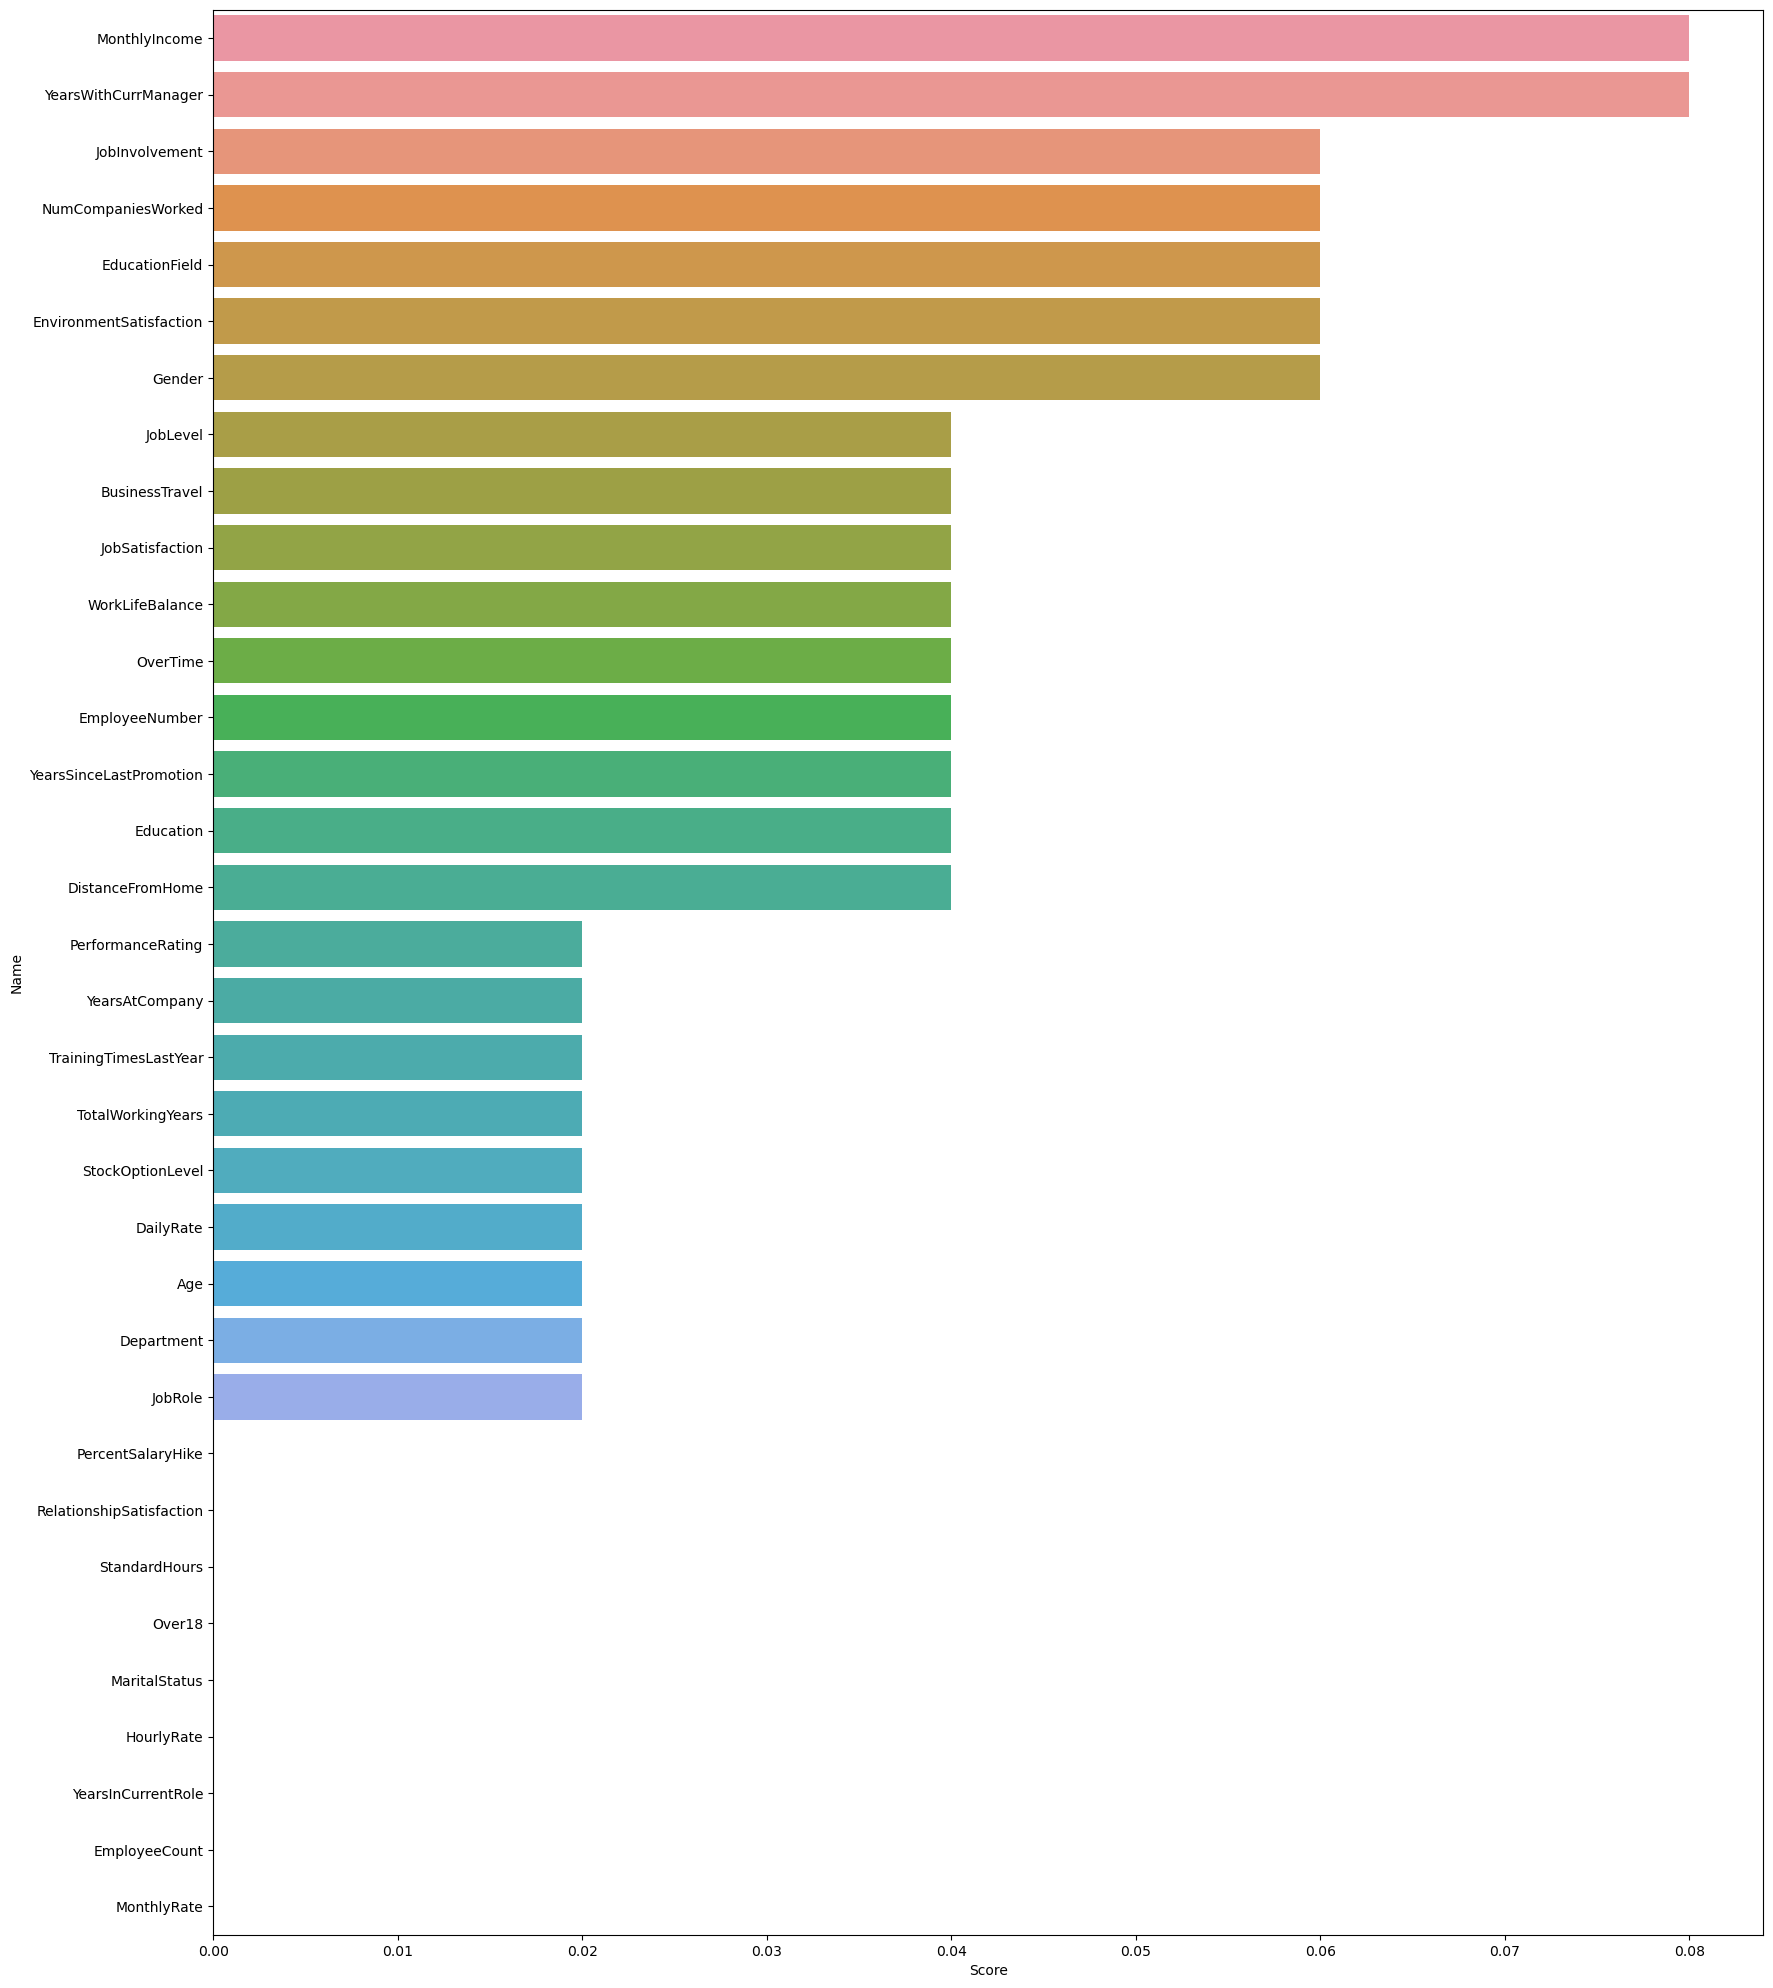

In [127]:
sns.barplot(x = imp_feature['Score'], y = imp_feature['Name'])
plt.show()

In [128]:
# from the above graph, business travel and 
# job involvement has the equal importance and affect the most with the target variabele.

In [129]:
# 3.What changes from the base model had the most effect on model performance?
# Ada boost classifier produces the best model compared to the base model.

In [ ]:
# 4.